# TinyML-Autopilot Processor Comparison Analysis

This notebook analyzes the performance comparison between **PSG** and **TPUSG** processors across different models and parameter configurations.

## Core Analysis Framework:
- **2 Processors**: PSG vs TPUSG  
- **5 Models**: qwen32b, qwen14b, phi4, gemma3:27b, codestral
- **2 Conditions**: With Parameters vs Without Parameters
- **Goal**: Determine which processor performs better under different configurations

In [34]:
skipped_error_gdk={('212e', '5d3d'), ('3193', '0928'), ('212e', 'fd19'), ('3193', '50de'), ('3193', '8315'), ('212e', '48f9'), ('212e', 'a551'), ('3193', '977a'), ('212e', '26c0'), ('7854', '8d31'), ('3193', '7975'), ('3193', '2fb8'), ('3193', 'ae70'), ('212e', 'bd42'), ('85a9', '2962'), ('3193', '00a9'), ('212e', 'f202'), ('3193', '490d'), ('3193', '305a'), ('85a9', '6b40'), ('212e', '1d25'), ('3193', '7896'), ('85a9', 'dd53'), ('212e', '5613'), ('3193', '7c26'), ('212e', 'e6da'), ('3193', '153b'), ('212e', '5637'), ('212e', 'e3e3'), ('7854', 'dd8e'), ('212e', '6902'), ('212e', '5cd2'), ('212e', '029e'), ('3193', 'f26d'), ('212e', '419c'), ('3193', '554d'), ('212e', '4c6b'), ('212e', '0b71'), ('212e', 'e991'), ('3193', 'd28d'), ('212e', 'ab3f'), ('4b1a', '1730'), ('212e', '1dd2'), ('212e', '9d19'), ('7854', '02dd'), ('7854', '4321'), ('3193', '4a88'), ('3193', '129b'), ('4b1a', '4b19'), ('3193', '7487'), ('3193', '5746'), ('3193', 'd121'), ('212e', '6a17'), ('3193', '4e4e'), ('212e', 'fda5'), ('85a9', '63ae'), ('212e', 'f5ce'), ('3193', '3234'), ('9eb0', 'c3e0'), ('3193', 'dc4c'), ('3193', 'f30c'), ('212e', 'f6c9'), ('e6d3', 'ea5f'), ('c8f6', '6820'), ('212e', '2395'), ('3193', '63de'), ('85a9', '5199'), ('85a9', '8e01'), ('212e', '5c4e'), ('3193', '8e6e'), ('3193', '3415'), ('7854', '73cf'), ('3193', '5567'), ('85a9', '0b55'), ('7854', 'ee82'), ('3193', 'be87'), ('85a9', 'a688'), ('212e', 'a4ae'), ('212e', 'ef7b')}

skipped_error_non_gdk={('85a9', '9583'), ('7854', 'e3df'), ('782e', '8bce'), ('33b8', '85f8'), ('33b8', 'fcde'), ('85a9', 'a382'), ('c8f6', 'c524'), ('1974', '5805'), ('95ba', '7e0b'), ('33b8', '32cd'), ('95ba', 'b7e5'), ('33b8', 'a2dd'), ('04fd', '470d'), ('1974', 'a210'), ('33b8', '9527'), ('85a9', 'a3bd'), ('04fd', 'a7b0'), ('33b8', 'c670'), ('c8f6', '09cb'), ('373e', '1957'), ('1974', '5959'), ('c8f6', '3f29'), ('85a9', '9719'), ('782e', '3cad'), ('33b8', '84c5'), ('33b8', '69a2'), ('33b8', 'ea1c'), ('e6d3', 'e6c6'), ('33b8', 'da75'), ('33b8', '08f6'), ('33b8', '531d'), ('85a9', '4c6a'), ('e6d3', '9586'), ('1e79', '9d79'), ('33b8', 'af26'), ('33b8', '6a8f'), ('33b8', 'bfd9'), ('1974', 'a559'), ('85a9', 'e73d'), ('33b8', '66ba'), ('85a9', '7813'), ('33b8', '6781'), ('33b8', '2e33'), ('7854', '35ae'), ('7854', 'f7ee'), ('33b8', 'c6fb'), ('33b8', 'b281'), ('33b8', 'dfea'), ('33b8', 'fd90'), ('33b8', '9b79'), ('85a9', '1901'), ('33b8', 'c08e'), ('33b8', 'c2b6'), ('85a9', 'd27e'), ('85a9', '1735'), ('33b8', '0841'), ('1974', '9a9b'), ('85a9', 'ec76'), ('c8f6', '6536'), ('ee11', 'd958'), ('33b8', 'ffbf'), ('33b8', '42e6'), ('33b8', 'd6ee'), ('33b8', 'f8c0')}

skipped_error_all= skipped_error_gdk.union(skipped_error_non_gdk)

### Combine csv files

In [35]:
import glob
import os
from pathlib import Path

import pandas as pd


def combine_csv_files():
    # %%
    # Base directory for data analysis
    base_dir = "/Users/hann/Projects/reference-benchmark-tinyml_llm/data_analysis/2025"
    
    # Pattern to find all CSV files
    # The folder name need to be something greater than 05 as the leading two numbers separated by dot. 
    
    
    
    # List all folders in base_dir and filter those with leading numbers > 05
    valid_folders = []
    for folder in os.listdir(base_dir):
        if os.path.isdir(os.path.join(base_dir, folder)):
            parts = folder.split('.')
            if len(parts) >= 2 and parts[0].isdigit() and int(parts[0]) >= 4:
                valid_folders.append(folder)

    # Build glob patterns for each valid folder
    csv_files = []
    for folder in valid_folders:
        pattern = os.path.join(base_dir, folder, "processed_data", "**", "*.csv")
        csv_files.extend(glob.glob(pattern, recursive=True))
    
    # Find all CSV files
    # csv_files = glob.glob(csv_pattern, recursive=True)
    print(f"Valid folders found: {valid_folders}")
    print(f"Found {len(csv_files)} CSV files to combine")
    
    
    # %%
    # List to store all dataframes
    all_dataframes = []
    
    # Process each CSV file
    for csv_file in csv_files:
        try:
            # Read the CSV file
            df = pd.read_csv(csv_file)
            
            # Add metadata columns for tracking
            df['source_file'] = os.path.basename(csv_file)
            df['source_path'] = csv_file
            
            # Extract date from path (e.g., "07.29" from path)
            path_parts = Path(csv_file).parts
            date_index = next((i for i, part in enumerate(path_parts) if part == "2025"), None)
            if date_index and date_index + 1 < len(path_parts):
                df['test_date'] = path_parts[date_index + 1]
            else:
                df['test_date'] = 'unknown'
            
            # Extract model info from the processed_data folder name
            processed_data_index = next((i for i, part in enumerate(path_parts) if part == "processed_data"), None)
            if processed_data_index and processed_data_index + 1 < len(path_parts):
                model_name=path_parts[processed_data_index + 1]
                if "_" in model_name:
                    df['model_config'] = model_name.split("_", 1)[0]
                else:
                    df['model_config'] = model_name
            else:
                df['model_config'] = 'unknown'
            
            all_dataframes.append(df)
            # print(f"Processed: {csv_file} - {len(df)} rows")
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
            continue
    
    if not all_dataframes:
        print("No CSV files were successfully processed!")
        return
    
    # Combine all dataframes
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df['generation_count'] = combined_df['generation_count'].astype(int)
    combined_df=combined_df[combined_df['generation_count'] > 0]
    # Sort by batch_id and then by num_run if availabled
    if 'batch_id' in combined_df.columns:
        sort_columns = ['batch_id']
        if 'num_run' in combined_df.columns:
            sort_columns.append('num_run')
        combined_df = combined_df.sort_values(sort_columns)
    
    # Output file path
    output_file = "/Users/hann/Projects/reference-benchmark-tinyml_llm/combined_tinyml_benchmark_data.csv"
    
    # Save combined CSV
    combined_df.to_csv(output_file, index=False)
    
 
    
    return output_file

def removed_skipped_errors(df, skipped_set):
    """
    Remove rows where for any (batch_sub, trace_sub) in skipped_set:
    - batch_sub is in the value of 'batch_id'
    - trace_sub is in the value of 'trace_id'
    """
    if not skipped_set or 'batch_id' not in df.columns or 'trace_id' not in df.columns:
        return df

    # Build a boolean mask for all rows to keep
    mask = pd.Series([True] * len(df))
    rows_to_remove = []

    for batch_sub, trace_sub in skipped_set:
        # Find rows where both substrings are present
        match = df['batch_id'].astype(str).str.contains(batch_sub, na=False) & \
                df['trace_id'].astype(str).str.contains(trace_sub, na=False)
        if match.any():
            rows_to_remove.extend(df[match].index.tolist())
            mask = mask & (~match)

    if rows_to_remove:
        print(f"Removing {len(rows_to_remove)} rows due to skipped_error set.")
        print(df.loc[rows_to_remove][['batch_id', 'trace_id']])

    return df[mask].reset_index(drop=True)


    


def read_csv_filtered(csv_path):
    # Read and clean the dataset
    df = pd.read_csv(csv_path)
    filtered_df = df 
    # filtered_df = removed_skipped_errors(df, skipped_error_all)

    return filtered_df

combine_csv_files()

Valid folders found: ['08.09', '08.07', '08.01', '08.06', '07.30_a', '08.08', '08.15', '08.12', '07.31', '08.13', '08.14', '07.30', '05.21', '05.19', '08.03', '08.04', '07.29', '08.05', '07.30_b', '08.02', '07.28', '08.11', '08.16', '08.18', '08.17', '08.10']
Found 50 CSV files to combine


'/Users/hann/Projects/reference-benchmark-tinyml_llm/combined_tinyml_benchmark_data.csv'

## 📁 Data Loading & CSV Combination

**Purpose**: Load and combine TinyML benchmark data from multiple CSV files across different experiment dates

**Data Sources**:
- Directory: `/data_analysis/2025/` with folders from April onwards (`04.*` and later)
- Multiple CSV files from different experiment batches
- Recursive search through `processed_data/` subdirectories

**Processing Steps**:
1. **Discovery**: Finds all valid date folders and CSV files
2. **Extraction**: Parses metadata from file paths (test dates, model configs)
3. **Combination**: Merges all CSV files into a single dataframe
4. **Cleaning**: Filters out invalid generation counts and sorts by batch_id

**Output**: 
- `combined_df`: Unified dataset with all benchmark results
- Metadata columns: `source_file`, `test_date`, `model_config`
- Cleaned and sorted data ready for analysis

**Key Features**: Handles path parsing, error handling, and automatic metadata extraction from file structure.

In [36]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

def model_config_trim(value):
    value = value.split("_")[0]
    if "qwen2.5-coder" in value:
        value = value.replace("qwen2.5-coder:", "qwen")
    
    return value

# Core utility functions - consolidated and simplified
def extract_processor(batch_id):
    """Extract processor type from batch_id - one function, one purpose"""
    processor_map = {'psg': 'psg', 'tpusg': 'tpusg', 'tpsg': 'tpusg', 'sg': 'sg', 'dp': 'dp', 'mc': 'mc'}
    for key, value in processor_map.items():
        if key in batch_id:
            return value
    return 'unknown'

def calculate_success_metrics(data_group):
    """Calculate all success rate metrics in one place - eliminate redundancy"""
    success_data = data_group[data_group['status'] == 'success']
    total_runs = len(data_group)
    
    if total_runs == 0:
        return {metric: 0.0 for metric in ['traditional', 'efficiency', 'exponential', 'linear', 'robust']}
    
    traditional_rate = len(success_data) / total_runs * 100
    
    if success_data.empty or 'generation_count' not in success_data.columns:
        return {metric: traditional_rate for metric in ['traditional', 'efficiency', 'exponential', 'linear', 'robust']}
    
    # All weighted calculations in vectorized operations - simpler and faster
    gen_counts = success_data['generation_count']
    efficiency_scores = (1 / gen_counts).sum() / total_runs * 100
    exponential_scores = np.exp(-0.5 * (gen_counts - 1)).sum() / total_runs * 100
    linear_scores = np.maximum(1 - 0.2 * (gen_counts - 1), 0.1).sum() / total_runs * 100
    robust_scores = gen_counts.apply(lambda x: 1.0 if x <= 2 else 0.6 if x <= 4 else 0.3 if x <= 6 else 0.1).sum() / total_runs * 100
    
    return {
        'traditional': traditional_rate,
        'efficiency': efficiency_scores,
        'exponential': exponential_scores,
        'linear': linear_scores,
        'robust': robust_scores
    }

## 🔧 Core Utilities & Library Setup

**Purpose**: Essential imports, configuration, and utility functions for TinyML benchmark analysis

**Libraries**:
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical computing
- **matplotlib/seaborn**: Visualization and plotting
- **pathlib**: File path handling

**Configuration**:
- Enhanced pandas display options for better readability
- Column width and display optimization

**Utility Functions**:
- `model_config_trim()`: Cleans and standardizes model configuration names
- `extract_processor()`: Extracts processor type from batch IDs
- Handles various processor mappings (psg, tpusg, etc.)

**Key Features**: 
- Consolidated utility functions following single-purpose principle
- Processor mapping for different naming conventions
- Display optimization for large datasets

In [37]:
# Universal analysis function - eliminates massive code duplication
def analyze_processor_comparison(df, group_columns=['processor', 'model_config', 'parameters']):
    """One function to rule them all - generates complete comparison analysis"""
    
    # Calculate basic stats and all weighted metrics in one pass
    comparison_data = []
    for group_keys, group_data in df.groupby(group_columns):
        metrics = calculate_success_metrics(group_data)
        
        # Create group identifier
        group_dict = dict(zip(group_columns, group_keys))
        
        # Basic stats
        basic_stats = {
            'total_runs': len(group_data),
            'successes': len(group_data[group_data['status'] == 'success']),
            'avg_tokens': group_data['total_tokens'].mean()
        }
        
        # Combine all metrics
        result = {**group_dict, **basic_stats, **metrics}
        comparison_data.append(result)
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Add advantage analysis if comparing processors
    if 'processor' in group_columns:
        advantage_data = calculate_processor_advantages(comparison_df, group_columns)
        return comparison_df, advantage_data
    
    return comparison_df, None

def calculate_processor_advantages(comparison_df, group_columns):
    """Calculate processor advantages - extracted from redundant code"""
    advantage_data = []
    
    # Get non-processor grouping columns
    other_columns = [col for col in group_columns if col != 'processor']
    
    for group_keys, group_data in comparison_df.groupby(other_columns):
        group_dict = dict(zip(other_columns, group_keys))
        
        psg_data = group_data[group_data['processor'] == 'psg']
        tpusg_data = group_data[group_data['processor'] == 'tpusg']
        
        if len(psg_data) == 1 and len(tpusg_data) == 1:
            psg_rate = psg_data['traditional'].iloc[0]
            tpusg_rate = tpusg_data['traditional'].iloc[0]
            advantage = tpusg_rate - psg_rate
            winner = 'TPUSG' if advantage > 0 else 'PSG' if advantage < 0 else 'TIE'
            
            advantage_data.append({
                **group_dict,
                'psg_rate': psg_rate,
                'tpusg_rate': tpusg_rate,
                'advantage': advantage,
                'winner': winner
            })
    
    return pd.DataFrame(advantage_data)


def get_preprocessed_dataset():
    # Load the Combined CSV Dataset
    csv_path = "/Users/hann/Projects/reference-benchmark-tinyml_llm/combined_tinyml_benchmark_data.csv"

    # Read and clean the dataset
    df = read_csv_filtered(csv_path)

    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")

    # Clean and prepare data
    df.drop(columns=['source_file','trace_id', 'source_path','prompt_cost', 'completion_cost','total_cost'], inplace=True)
    df['model_config'] = df['model_config'].apply(model_config_trim)
    df['parameters'] = df['parameters'].apply(lambda x: False if pd.isna(x) else len(str(x)) > 0)
    df['batch_id'] = df['batch_id'].str.replace("qwen2.5-coder:", "qwen").str.replace("_batch", "")

    # Filter data from July onwards and extract processor type
    df = df[df['test_date'].str.split('.').str[0].astype(int)>=7]
    df['processor'] = df['batch_id'].map(extract_processor)

    # All rules in the format (processor, model, parameter, category_name)
    rules = [
        ('psg',   'qwen32b',   True,  'psg-qwen32b-True'),
        ('psg',   'qwen32b',   False, 'psg-qwen32b-False'),
        ('psg',   'qwen14b',   True,  'psg-qwen14b-True'),
        ('psg',   'qwen14b',   False, 'psg-qwen14b-False'),
        ('psg',   'phi4',      True,  'psg-phi4-True'),
        ('psg',   'phi4',      False, 'psg-phi4-False'),
        ('psg',   'gemma3:27b',True,  'psg-gemma3:27b-True'),
        ('psg',   'gemma3:27b',False, 'psg-gemma3:27b-False'),
        ('psg',   'codestral', True,  'psg-codestral-True'),
        ('psg',   'codestral', False, 'psg-codestral-False'),

        ('tpusg', 'qwen32b',   True,  'tpusg-qwen32b-True'),
        ('tpusg', 'qwen32b',   False, 'tpusg-qwen32b-False'),
        ('tpusg', 'qwen14b',   True,  'tpusg-qwen14b-True'),
        ('tpusg', 'qwen14b',   False, 'tpusg-qwen14b-False'),
        ('tpusg', 'phi4',      True,  'tpusg-phi4-True'),
        ('tpusg', 'phi4',      False, 'tpusg-phi4-False'),
        ('tpusg', 'gemma3:27b',True,  'tpusg-gemma3:27b-True'),
        ('tpusg', 'gemma3:27b',False, 'tpusg-gemma3:27b-False'),
        ('tpusg', 'codestral', True,  'tpusg-codestral-True'),
        ('tpusg', 'codestral', False, 'tpusg-codestral-False'),
    ]

    # Build conditions and choices
    conditions = [
        (df['processor'] == proc) &
        (df['model_config'] == model) &
        (df['parameters'] == param)
        for proc, model, param, _ in rules
    ]
    choices = [category for _, _, _, category in rules]

    # Create category column
    df['category'] = np.select(conditions, choices, default='Other')

    return df

df = get_preprocessed_dataset()
df_original=df
print(f"Final shape: {df.shape}")

print(f"Column names: {df.columns.tolist()}")
df.head()
 


Dataset loaded successfully!
Shape: (1399, 20)
Final shape: (1279, 16)
Column names: ['num_run', 'name', 'batch_id', 'status', 'latency', 'total_tokens', 'prompt_tokens', 'completion_tokens', 'parameters', 'generation_count', 'tags', 'timestamp', 'test_date', 'model_config', 'processor', 'category']


,num_run,name,batch_id,status,latency,total_tokens,prompt_tokens,completion_tokens,parameters,generation_count,tags,timestamp,test_date,model_config,processor,category
30,1,24c0_py_sketch_generator,codestral_3adb_psg,failure,79.15,12729,10052,2677,True,5,"['benchmark', 'codestral:latest', 'py_sketch_g...",1754402461,08.08,codestral,psg,psg-codestral-True
31,2,7881_py_sketch_generator,codestral_3adb_psg,failure,98.48,13489,10052,3437,True,5,"['benchmark', 'codestral:latest', 'py_sketch_g...",1754402548,08.08,codestral,psg,psg-codestral-True
32,3,fafb_py_sketch_generator,codestral_3adb_psg,success,104.55,13731,10052,3679,True,5,"['benchmark', 'codestral:latest', 'py_sketch_g...",1754402654,08.08,codestral,psg,psg-codestral-True
33,4,e270_py_sketch_generator,codestral_3adb_psg,failure,94.43,13304,10052,3252,True,5,"['benchmark', 'codestral:latest', 'py_sketch_g...",1754402766,08.08,codestral,psg,psg-codestral-True
34,5,6ef4_py_sketch_generator,codestral_3adb_psg,failure,102.78,13653,10052,3601,True,5,"['benchmark', 'codestral:latest', 'py_sketch_g...",1754402868,08.08,codestral,psg,psg-codestral-True


## 📊 Core Analysis Engine

**Purpose**: Universal analysis function for comprehensive processor comparison across multiple success rate calculation methods

**Key Functions**:
- `analyze_processor_comparison()`: Main analysis engine that processes grouped data
- `calculate_processor_advantages()`: Computes head-to-head processor advantages
- `calculate_success_metrics()`: Calculates 5 different success rate methodologies

**Success Rate Methodologies**:
1. **Traditional**: Simple success/total ratio
2. **Efficiency**: Weighted by generation efficiency (1/generation_count)
3. **Exponential**: Exponential decay based on generation attempts
4. **Linear**: Linear penalty for multiple generations
5. **Robust**: Tiered scoring system with discrete performance levels

**Analysis Framework**:
- Groups data by processor, model, and parameter conditions
- Calculates comprehensive statistics for each group
- Performs head-to-head comparisons between PSG and TPUSG
- Outputs structured comparison DataFrame and advantage analysis

**Output**: `comparison_df` (complete metrics) and `advantage_df` (head-to-head comparisons)

## Processor Performance Comparison

Direct comparison between PSG and TPUSG processors across all model configurations and parameter conditions.

In [38]:
# Core Processor Comparison Analysis
print("🔄 PROCESSOR COMPARISON: PSG vs TPUSG")
print("=" * 60)

# Calculate success rates for each combination
comparison_df = df.groupby(['processor', 'model_config', 'parameters']).agg({
    'status': ['count', lambda x: (x == 'success').sum()],
    'total_tokens': 'mean',
    'category': 'first',
    'batch_id': pd.Series.nunique 
}).round(2)

comparison_df.columns = ['total_runs', 'successes', 'avg_tokens', 'category','total_batches']
comparison_df['success_rate'] = (comparison_df['successes'] / comparison_df['total_runs'] * 100).round(2)

# Calculate weighted success rates for each group
weighted_rates_list = []
for (processor, model_config, parameters), group in df.groupby(['processor', 'model_config', 'parameters']):
    weighted_rates = calculate_success_metrics(group)
    weighted_rates_list.append({
        'processor': processor,
        'model_config': model_config, 
        'parameters': parameters,
        'category': group['category'].iloc[0], 
        **weighted_rates
    })

# Convert to DataFrame and merge with comparison_df
weighted_df = pd.DataFrame(weighted_rates_list)
comparison_df = comparison_df.reset_index()

# Merge the weighted rates
comparison_df = comparison_df.merge(
    weighted_df[['processor', 'model_config', 'parameters', 
                'efficiency', 'exponential', 
                'linear', 'robust']], 
    on=['processor', 'model_config', 'parameters'], 
    how='left'
)
comparison_df.columns.to_list()


# Round weighted rates to 2 decimal places
for col in ['efficiency', 'exponential', 'linear', 'robust']:
    comparison_df[col] = comparison_df[col].round(2)

print(f"📊 Data Summary:")
print(f"Total runs: {len(df)}",end=": ")
print(f"PSG/TPUSG runs: {len(df[df['processor'] == 'psg'])}/{len(df[df['processor'] == 'tpusg'])}")
 
print(f"Models : {', '.join(sorted(df['model_config'].unique()))}")
print(f"Parameter conditions: P ({len(df[df['parameters'] == True])}) vs NP ({len(df[df['parameters'] == False])})")

print(f"\n📈 Complete Processor Comparison Matrix:")
print("-" * 60)

# Create a comprehensive comparison table
pivot_table = comparison_df.pivot_table(
    values='success_rate',
    index=['model_config', 'parameters'], 
    columns='processor',
    fill_value=0
).round(1)

print(pivot_table)

# Calculate processor advantage
print(f"\n🎯 PROCESSOR ADVANTAGE ANALYSIS:")
print("-" * 60)

advantage_data = []
for model in comparison_df['model_config'].unique():
    for param_condition in [True, False]:
        model_data = comparison_df[
            (comparison_df['model_config'] == model) & 
            (comparison_df['parameters'] == param_condition)
        ]
        
        if len(model_data) == 2:  # Both processors tested
            psg_rate = model_data[model_data['processor'] == 'psg']['success_rate'].iloc[0]
            tpusg_rate = model_data[model_data['processor'] == 'tpusg']['success_rate'].iloc[0]
            advantage = tpusg_rate - psg_rate
            winner = 'TPUSG' if advantage > 0 else 'PSG' if advantage < 0 else 'TIE'
            
            advantage_data.append({
                'model': model,
                'parameters': 'With' if param_condition else 'Without',
                'psg_rate': psg_rate,
                'tpusg_rate': tpusg_rate,
                'advantage': advantage,
                'winner': winner
            })

advantage_df = pd.DataFrame(advantage_data)

# Display advantage analysis
for _, row in advantage_df.iterrows():
    param_str = row['parameters']
    print(f"{row['model']} ({param_str} params): PSG {row['psg_rate']:.1f}% vs TPUSG {row['tpusg_rate']:.1f}% → {row['winner']} (+{row['advantage']:.1f}%)")

# Summary statistics
psg_wins = len(advantage_df[advantage_df['winner'] == 'PSG'])
tpusg_wins = len(advantage_df[advantage_df['winner'] == 'TPUSG'])
ties = len(advantage_df[advantage_df['winner'] == 'TIE'])

print(f"\n📊 SUMMARY:")
print(f"PSG wins: {psg_wins}/{len(advantage_df)} configurations")
print(f"TPUSG wins: {tpusg_wins}/{len(advantage_df)} configurations") 
print(f"Ties: {ties}/{len(advantage_df)} configurations")

# Display comparison_df with all rates for verification
print(f"\n📋 COMPLETE COMPARISON TABLE (Traditional + Weighted Success Rates):")
print("-" * 100)


🔄 PROCESSOR COMPARISON: PSG vs TPUSG
📊 Data Summary:
Total runs: 1279: PSG/TPUSG runs: 665/614
Models : codestral, gemma3:27b, phi4, qwen14b, qwen32b
Parameter conditions: P (768) vs NP (511)

📈 Complete Processor Comparison Matrix:
------------------------------------------------------------
processor                  psg  tpusg
model_config parameters              
codestral    False        16.7   33.3
             True         10.0   26.7
gemma3:27b   False        53.3    6.7
             True         71.2    0.0
phi4         False        73.3   96.7
             True        100.0  100.0
qwen14b      False        26.7   87.5
             True          4.6  100.0
qwen32b      False        50.0   96.7
             True         39.7   35.0

🎯 PROCESSOR ADVANTAGE ANALYSIS:
------------------------------------------------------------
codestral (With params): PSG 10.0% vs TPUSG 26.7% → TPUSG (+16.7%)
codestral (Without params): PSG 16.7% vs TPUSG 33.3% → TPUSG (+16.7%)
gemma3:27b (With pa

In [39]:
display_columns = ['total_runs','total_batches', 'successes', 
                   'traditional', 'efficiency', 'exponential', 
                   'linear', 'robust', 'avg_tokens' ]
comparison_df.set_index("category", inplace=True)
# comparison_df


comparison_df=comparison_df.rename(columns={"success_rate":"traditional"})
comparison_df


,processor,model_config,parameters,total_runs,successes,avg_tokens,total_batches,traditional,efficiency,exponential,linear,robust
category,,,,,,,,,,,,
psg-codestral-False,psg,codestral,False,30,5,12638.83,1,16.67,7.22,7.27,10.00,11.33
psg-codestral-True,psg,codestral,True,90,9,13197.82,3,10.00,2.67,2.52,4.22,5.33
psg-gemma3:27b-False,psg,gemma3:27b,False,60,32,9948.50,2,53.33,30.42,32.13,39.67,44.00
psg-gemma3:27b-True,psg,gemma3:27b,True,52,37,12714.37,2,71.15,15.58,11.99,19.62,29.42
psg-phi4-False,psg,phi4,False,60,44,9462.22,2,73.33,36.14,36.96,46.33,52.67
psg-phi4-True,psg,phi4,True,60,60,2242.90,2,100.00,100.00,100.00,100.00,100.00
psg-qwen14b-False,psg,qwen14b,False,30,8,10776.90,1,26.67,16.89,16.69,18.67,19.33
psg-qwen14b-True,psg,qwen14b,True,87,4,11955.85,3,4.60,1.38,1.37,2.07,2.87
psg-qwen32b-False,psg,qwen32b,False,60,30,9810.17,2,50.00,35.53,36.00,40.00,42.33


## Visualization & Insights

Comprehensive visual analysis and strategic recommendations for processor selection.


📊 CREATING PROCESSOR COMPARISON VISUALIZATIONS


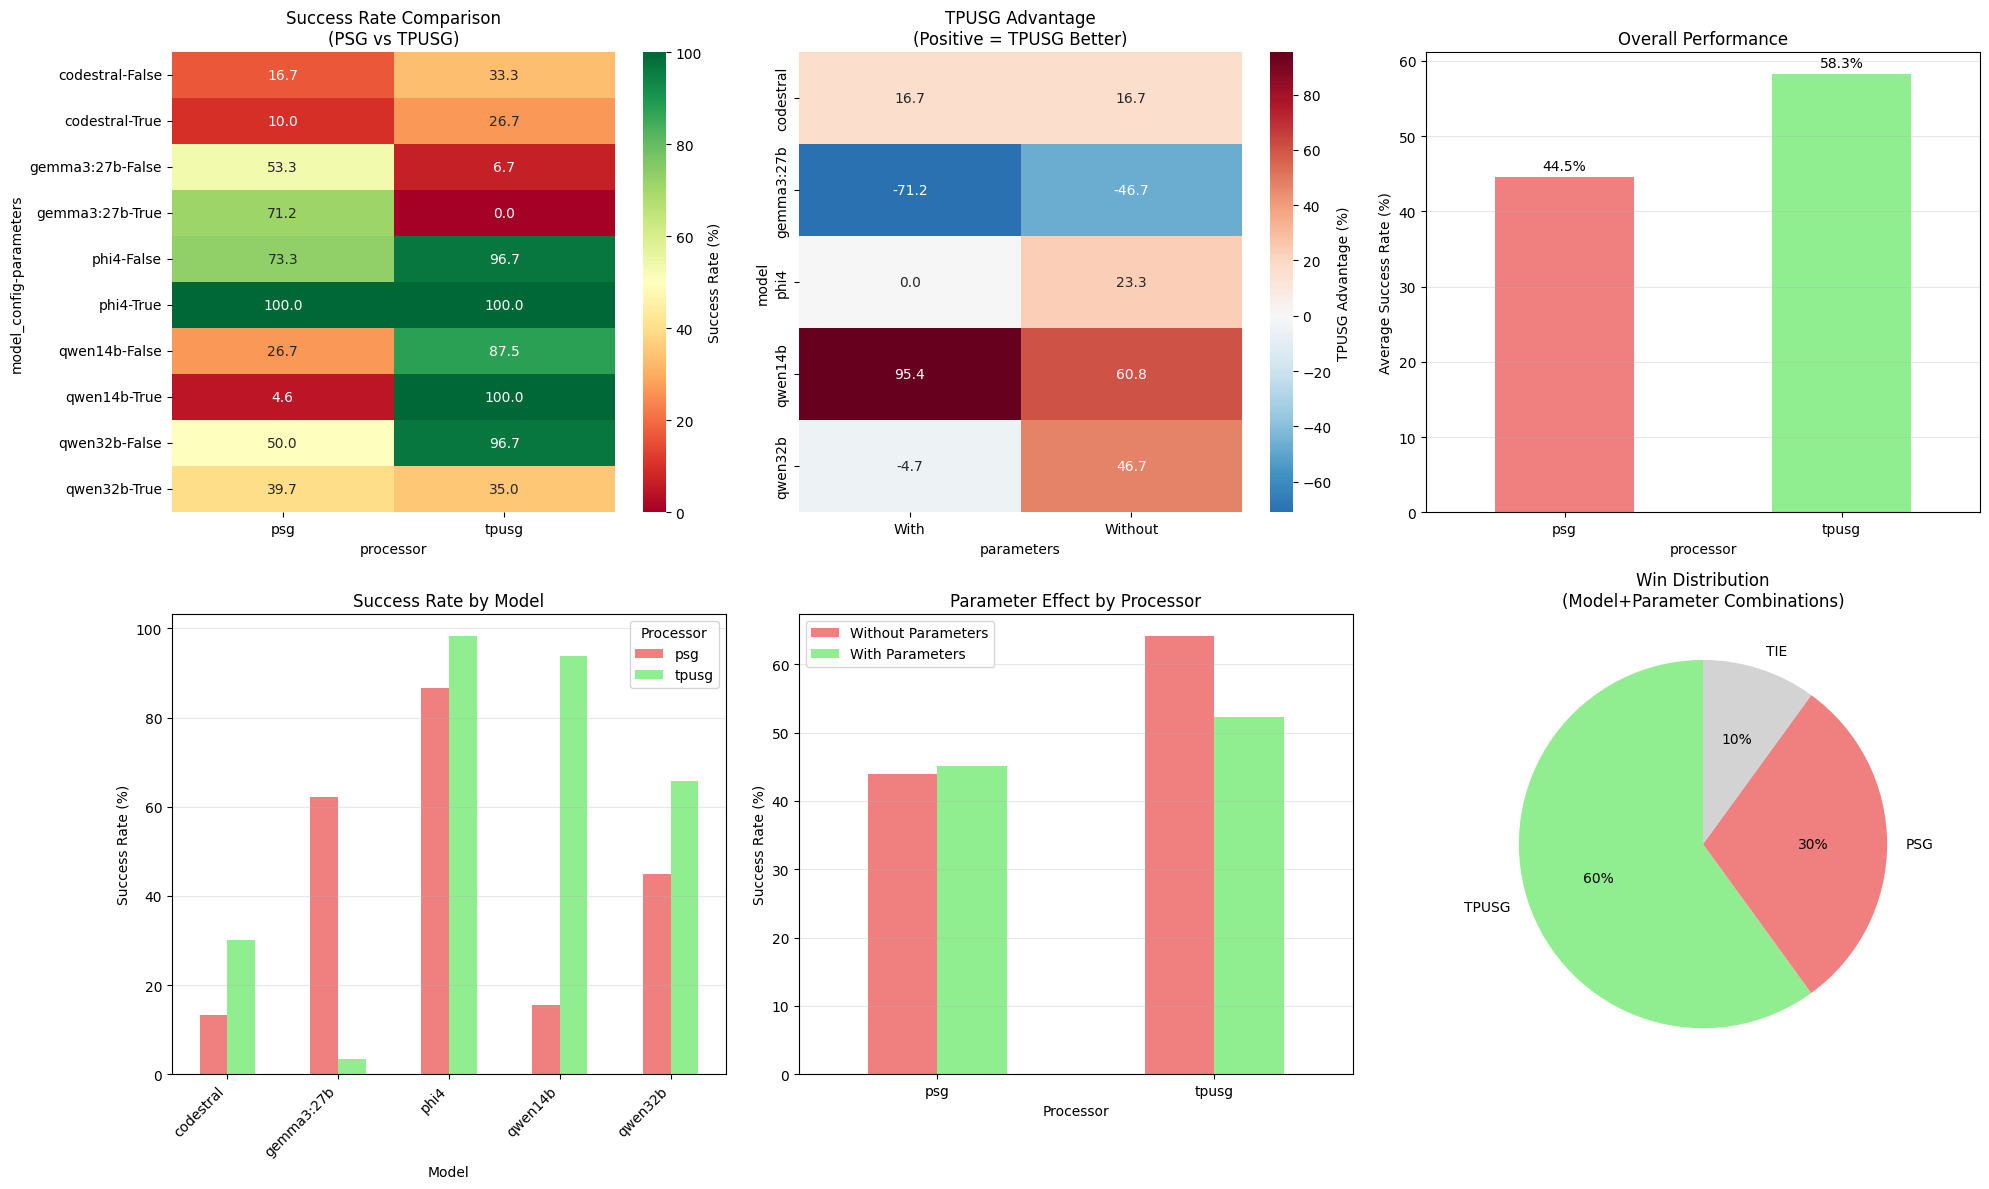

✅ Processor comparison visualizations created successfully!


In [40]:
# Unified visualization function - eliminate plotting repetition
def create_processor_visualizations(comparison_df, advantage_df):
    """Create all processor comparison visualizations in one consolidated function"""
    
    print("\n📊 CREATING PROCESSOR COMPARISON VISUALIZATIONS")
    print("=" * 60)
    
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Success Rate Heatmap
    ax1 = plt.subplot(2, 3, 1)
    
    # pivot_table = comparison_df.pivot_table(
    #     values='traditional', index=['model_config', 'parameters'], 
    #     columns='processor', fill_value=0
    # ).round(1)
    sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn', 
                cbar_kws={'label': 'Success Rate (%)'}, ax=ax1)
    ax1.set_title('Success Rate Comparison\n(PSG vs TPUSG)')
    
    # 2. Advantage Heatmap
    ax2 = plt.subplot(2, 3, 2)
    advantage_pivot = advantage_df.pivot_table(
        values='advantage', index='model', 
        columns='parameters', fill_value=0
    ).round(1)
    sns.heatmap(advantage_pivot, annot=True, fmt='.1f', cmap='RdBu_r', center=0,
                cbar_kws={'label': 'TPUSG Advantage (%)'}, ax=ax2)
    ax2.set_title('TPUSG Advantage\n(Positive = TPUSG Better)')
    
    # 3. Overall Performance
    ax3 = plt.subplot(2, 3, 3)
    overall_performance = comparison_df.groupby('processor')['traditional'].mean()
    bars = overall_performance.plot(kind='bar', ax=ax3, color=['lightcoral', 'lightgreen'])
    ax3.set_title('Overall Performance')
    ax3.set_ylabel('Average Success Rate (%)')
    plt.setp(ax3.get_xticklabels(), rotation=0)
    ax3.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(overall_performance.values):
        ax3.text(i, v + 1, f'{v:.1f}%', ha='center')
    
    # 4. Model Comparison
    ax4 = plt.subplot(2, 3, 4)
    model_comparison = comparison_df.groupby(['model_config', 'processor'])['traditional'].mean().unstack()
    model_comparison.plot(kind='bar', ax=ax4, color=['lightcoral', 'lightgreen'])
    ax4.set_title('Success Rate by Model')
    ax4.set_xlabel('Model')
    ax4.set_ylabel('Success Rate (%)')
    ax4.legend(title='Processor')
    plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
    ax4.grid(axis='y', alpha=0.3)
    
    # 5. Parameter Effect
    ax5 = plt.subplot(2, 3, 5)
    param_effect = comparison_df.groupby(['processor', 'parameters'])['traditional'].mean().unstack()
    param_effect.columns = ['Without Parameters', 'With Parameters']
    param_effect.plot(kind='bar', ax=ax5, color=['lightcoral', 'lightgreen'])
    ax5.set_title('Parameter Effect by Processor')
    ax5.set_xlabel('Processor')
    ax5.set_ylabel('Success Rate (%)')
    ax5.legend()
    plt.setp(ax5.get_xticklabels(), rotation=0)
    ax5.grid(axis='y', alpha=0.3)
    
    # 6. Win Distribution
    ax6 = plt.subplot(2, 3, 6)
    win_counts = advantage_df['winner'].value_counts()
    colors_pie = ['lightgreen' if x == 'TPUSG' else 'lightcoral' if x == 'PSG' else 'lightgray' for x in win_counts.index]
    ax6.pie(win_counts.values, labels=win_counts.index, autopct='%1.0f%%', 
            colors=colors_pie, startangle=90)
    ax6.set_title('Win Distribution\n(Model+Parameter Combinations)')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Processor comparison visualizations created successfully!")

# Execute consolidated visualization
create_processor_visualizations(comparison_df, advantage_df)


📊 TRADITIONAL vs WEIGHTED SUCCESS RATES COMPARISON


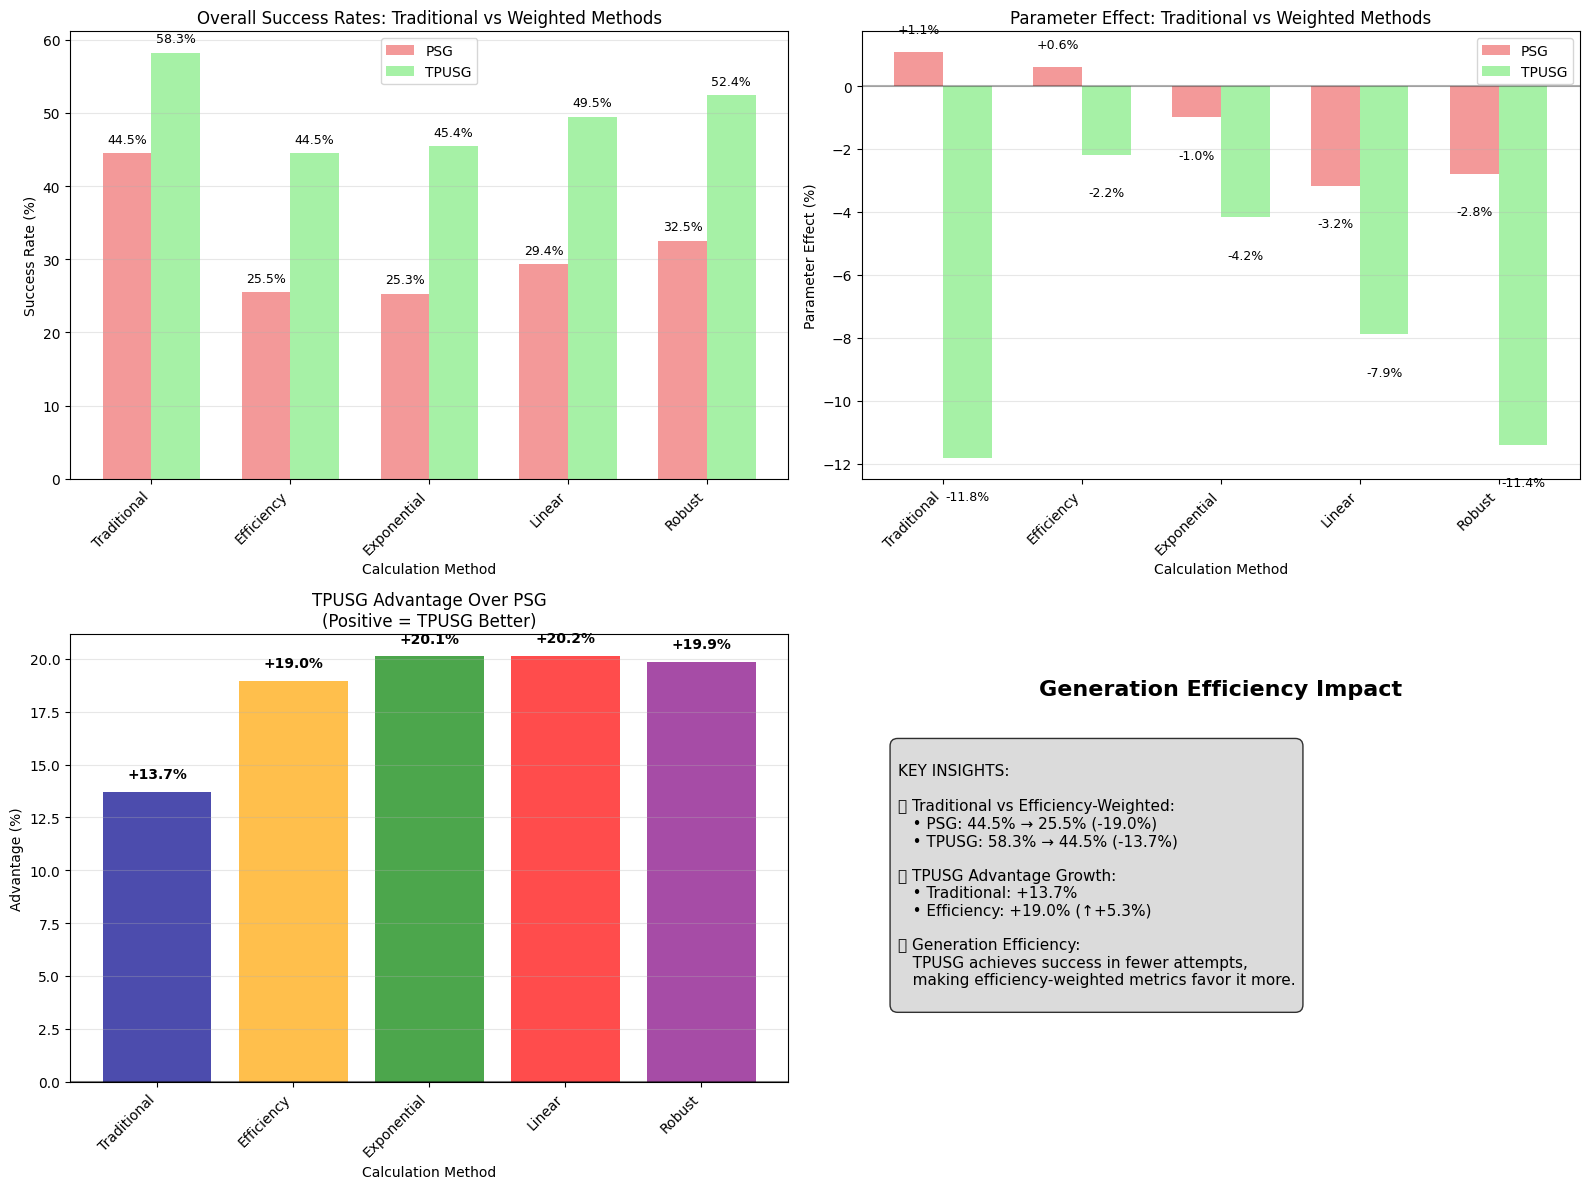

✅ Weighted success rate analysis complete!
📈 Efficiency-weighted metrics show TPUSG has a 19.0% advantage vs 13.7% traditional.


In [41]:

def create_weighted_comparison_viz(comparison_df):
    """Create weighted vs traditional comparison - one function, clean logic"""
    
    print("\n📊 TRADITIONAL vs WEIGHTED SUCCESS RATES COMPARISON")
    print("=" * 70)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Get metric data for both processors
    metrics = ['traditional', 'efficiency', 'exponential', 'linear', 'robust']
    method_names = ['Traditional', 'Efficiency', 'Exponential', 'Linear', 'Robust']
    
    # 1. Overall Performance Comparison
    psg_rates = [comparison_df[comparison_df['processor'] == 'psg'][metric].mean() for metric in metrics]
    tpusg_rates = [comparison_df[comparison_df['processor'] == 'tpusg'][metric].mean() for metric in metrics]
    
    x = np.arange(len(method_names))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, psg_rates, width, label='PSG', color='lightcoral', alpha=0.8)
    bars2 = ax1.bar(x + width/2, tpusg_rates, width, label='TPUSG', color='lightgreen', alpha=0.8)
    
    ax1.set_title('Overall Success Rates: Traditional vs Weighted Methods')
    ax1.set_xlabel('Calculation Method')
    ax1.set_ylabel('Success Rate (%)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(method_names, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (p, t) in enumerate(zip(psg_rates, tpusg_rates)):
        ax1.text(i - width/2, p + 1, f'{p:.1f}%', ha='center', va='bottom', fontsize=9)
        ax1.text(i + width/2, t + 1, f'{t:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # 2. Parameter Effect Comparison - simplified calculation
    def calc_param_effect(df, processor, metric):
        proc_data = df[df['processor'] == processor]
        with_params = proc_data[proc_data['parameters'] == True][metric].mean()
        without_params = proc_data[proc_data['parameters'] == False][metric].mean()
        return with_params - without_params
    
    psg_param_effects = [calc_param_effect(comparison_df, 'psg', metric) for metric in metrics]
    tpusg_param_effects = [calc_param_effect(comparison_df, 'tpusg', metric) for metric in metrics]
    
    bars3 = ax2.bar(x - width/2, psg_param_effects, width, label='PSG', color='lightcoral', alpha=0.8)
    bars4 = ax2.bar(x + width/2, tpusg_param_effects, width, label='TPUSG', color='lightgreen', alpha=0.8)
    
    ax2.set_title('Parameter Effect: Traditional vs Weighted Methods')
    ax2.set_xlabel('Calculation Method')
    ax2.set_ylabel('Parameter Effect (%)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(method_names, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for i, (p, t) in enumerate(zip(psg_param_effects, tpusg_param_effects)):
        ax2.text(i - width/2, p + (0.5 if p > 0 else -1), f'{p:+.1f}%', ha='center', va='bottom' if p > 0 else 'top', fontsize=9)
        ax2.text(i + width/2, t + (0.5 if t > 0 else -1), f'{t:+.1f}%', ha='center', va='bottom' if t > 0 else 'top', fontsize=9)
    
    # 3. Advantage Gap Analysis
    advantages = [tpusg_rates[i] - psg_rates[i] for i in range(len(metrics))]
    colors = ['darkblue', 'orange', 'green', 'red', 'purple']
    
    bars5 = ax3.bar(method_names, advantages, color=colors, alpha=0.7)
    ax3.set_title('TPUSG Advantage Over PSG\n(Positive = TPUSG Better)')
    ax3.set_xlabel('Calculation Method')
    ax3.set_ylabel('Advantage (%)')
    ax3.grid(axis='y', alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels
    for i, v in enumerate(advantages):
        ax3.text(i, v + (0.5 if v > 0 else -1), f'{v:+.1f}%', ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')
    
    # 4. Summary insights
    ax4.axis('off')
    ax4.text(0.5, 0.9, 'Generation Efficiency Impact', ha='center', va='top', fontsize=16, fontweight='bold', transform=ax4.transAxes)
    
    summary_text = f"""
KEY INSIGHTS:

🎯 Traditional vs Efficiency-Weighted:
   • PSG: {psg_rates[0]:.1f}% → {psg_rates[1]:.1f}% ({psg_rates[1]-psg_rates[0]:+.1f}%)
   • TPUSG: {tpusg_rates[0]:.1f}% → {tpusg_rates[1]:.1f}% ({tpusg_rates[1]-tpusg_rates[0]:+.1f}%)

📊 TPUSG Advantage Growth:
   • Traditional: +{advantages[0]:.1f}%
   • Efficiency: +{advantages[1]:.1f}% (↑{advantages[1]-advantages[0]:+.1f}%)

🔄 Generation Efficiency:
   TPUSG achieves success in fewer attempts,
   making efficiency-weighted metrics favor it more.
"""
    
    ax4.text(0.05, 0.75, summary_text, ha='left', va='top', fontsize=11, transform=ax4.transAxes, 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Weighted success rate analysis complete!")
    print(f"📈 Efficiency-weighted metrics show TPUSG has a {advantages[1]:.1f}% advantage vs {advantages[0]:.1f}% traditional.")

# Simplified detailed comparison chart - eliminate repetitive data extraction
def create_detailed_comparison_chart(comparison_df):
    """Create detailed processor comparison chart - consolidated logic"""
    
    print("\n📊 DETAILED PROCESSOR COMPARISON BY MODEL & PARAMETERS")
    print("=" * 70)
    
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Extract data efficiently - one pass through the data
    models = sorted(comparison_df['model_config'].unique())
    data_matrix = {
        'psg_with': [],
        'psg_without': [],
        'tpusg_with': [],
        'tpusg_without': []
    }
    
    for model in models:
        model_data = comparison_df[comparison_df['model_config'] == model]
        
        # Extract all combinations in one go
        for proc, param, key in [('psg', True, 'psg_with'), ('psg', False, 'psg_without'), 
                                ('tpusg', True, 'tpusg_with'), ('tpusg', False, 'tpusg_without')]:
            subset = model_data[(model_data['processor'] == proc) & (model_data['parameters'] == param)]
            data_matrix[key].append(subset['traditional'].iloc[0] if len(subset) > 0 else 0)
    
    # Create bars
    x = np.arange(len(models))
    width = 0.2
    
    colors = {'psg_with': 'lightcoral', 'psg_without': 'red', 
              'tpusg_with': 'lightgreen', 'tpusg_without': 'green'}
    labels = {'psg_with': 'PSG + Parameters', 'psg_without': 'PSG', 
              'tpusg_with': 'TPUSG + Parameters', 'tpusg_without': 'TPUSG'}
    
    bars = {}
    for i, (key, data) in enumerate(data_matrix.items()):
        position = x + (i - 1.5) * width
        bars[key] = ax.bar(position, data, width, label=labels[key], 
                          color=colors[key], alpha=0.8 if 'with' in key else 0.6)
    
    # Customize chart
    ax.set_xlabel('Model Configuration', fontsize=12, fontweight='bold')
    ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
    ax.set_title('Complete Processor Comparison: PSG vs TPUSG\nAcross Models and Parameter Configurations', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, max(max(data) for data in data_matrix.values()) * 1.1)
    
    # Add value labels
    for key, data in data_matrix.items():
        for bar, value in zip(bars[key], data):
            if value > 0:
                ax.text(bar.get_x() + bar.get_width()/2, value + 1,
                       f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Summary table
    print(f"\n📈 SUMMARY COMPARISON TABLE:")
    print("-" * 80)
    
    summary_data = []
    for i, model in enumerate(models):
        config_data = {key: data[i] for key, data in data_matrix.items()}
        best_config = max(config_data, key=config_data.get)
        
        summary_data.append({
            'Model': model,
            'PSG+Params': f"{config_data['psg_with']:.1f}%",
            'PSG': f"{config_data['psg_without']:.1f}%",
            'TPUSG+Params': f"{config_data['tpusg_with']:.1f}%",
            'TPUSG': f"{config_data['tpusg_without']:.1f}%",
            'Best_Config': labels[best_config]
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    print(f"\n✅ Complete processor comparison analysis finished!")
    print(f"📊 Chart shows all {len(models)} models × 2 processors × 2 parameter conditions = {len(models)*4} configurations")

create_weighted_comparison_viz(comparison_df)


📊 DETAILED PROCESSOR COMPARISON BY MODEL & PARAMETERS


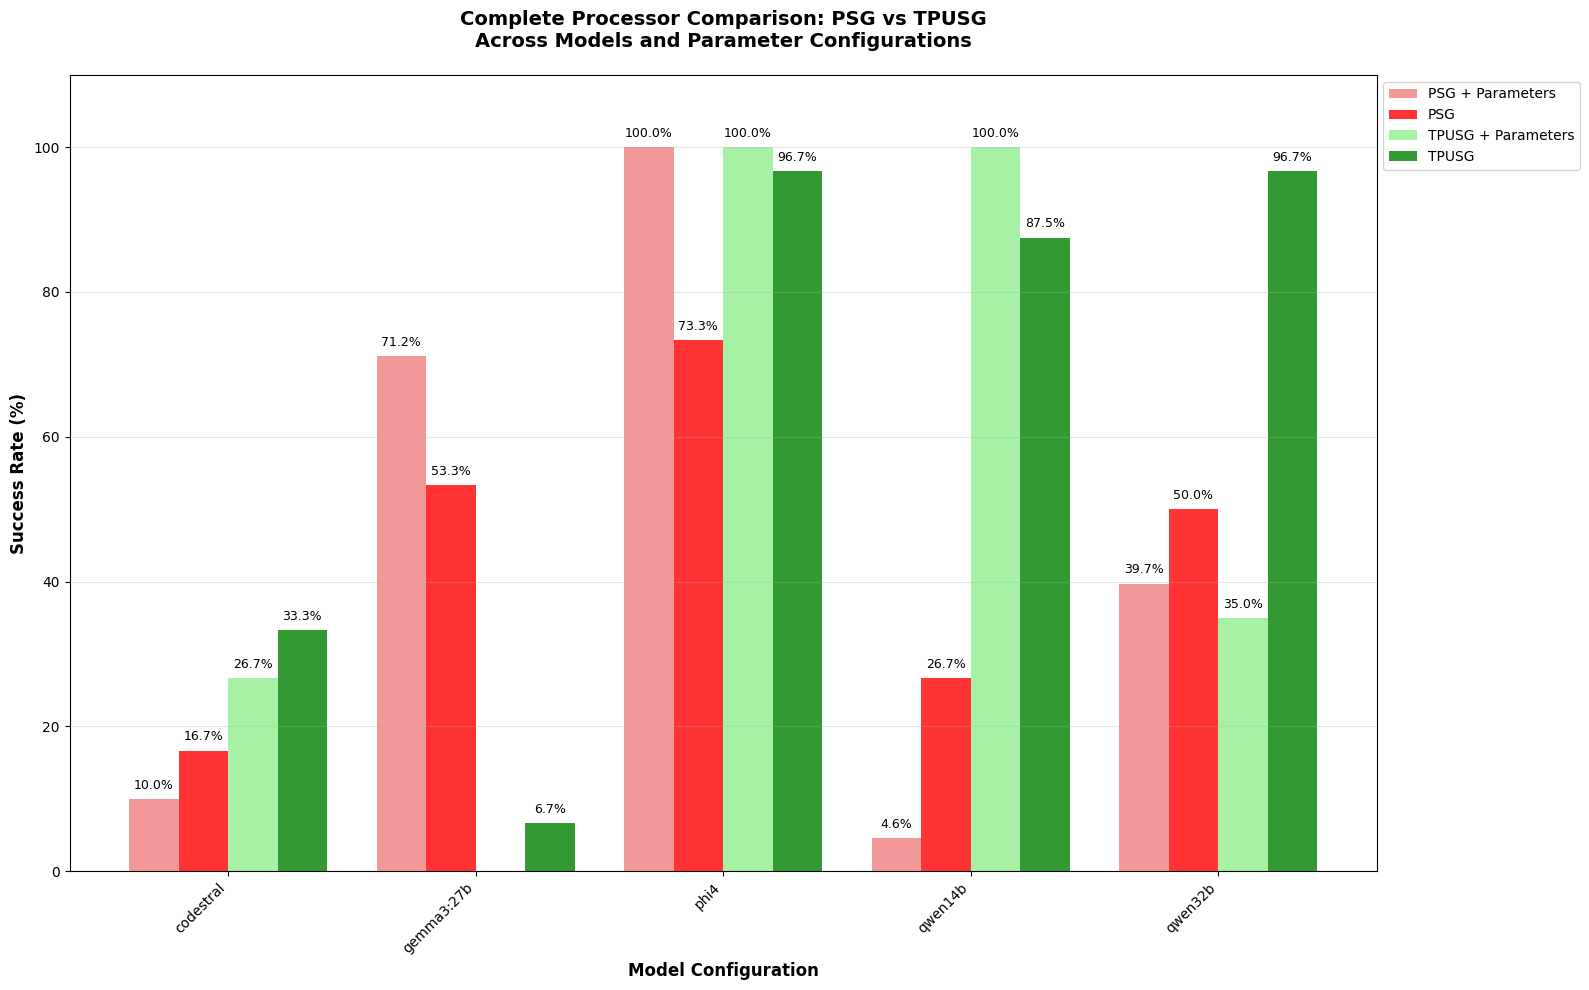


📈 SUMMARY COMPARISON TABLE:
--------------------------------------------------------------------------------
     Model PSG+Params   PSG TPUSG+Params TPUSG        Best_Config
 codestral      10.0% 16.7%        26.7% 33.3%              TPUSG
gemma3:27b      71.2% 53.3%         0.0%  6.7%   PSG + Parameters
      phi4     100.0% 73.3%       100.0% 96.7%   PSG + Parameters
   qwen14b       4.6% 26.7%       100.0% 87.5% TPUSG + Parameters
   qwen32b      39.7% 50.0%        35.0% 96.7%              TPUSG

✅ Complete processor comparison analysis finished!
📊 Chart shows all 5 models × 2 processors × 2 parameter conditions = 20 configurations


In [42]:
# Execute simplified detailed comparison
create_detailed_comparison_chart(comparison_df)


📈 BATCH SUCCESS RATE TIMELINE ANALYSIS
🔄 Processing batch timeline data...
📊 Analyzed 46 unique batches
📅 Date range: 2025-07-29 11:00 to 2025-08-18 17:16

📈 CREATING BATCH TIMELINE VISUALIZATION...


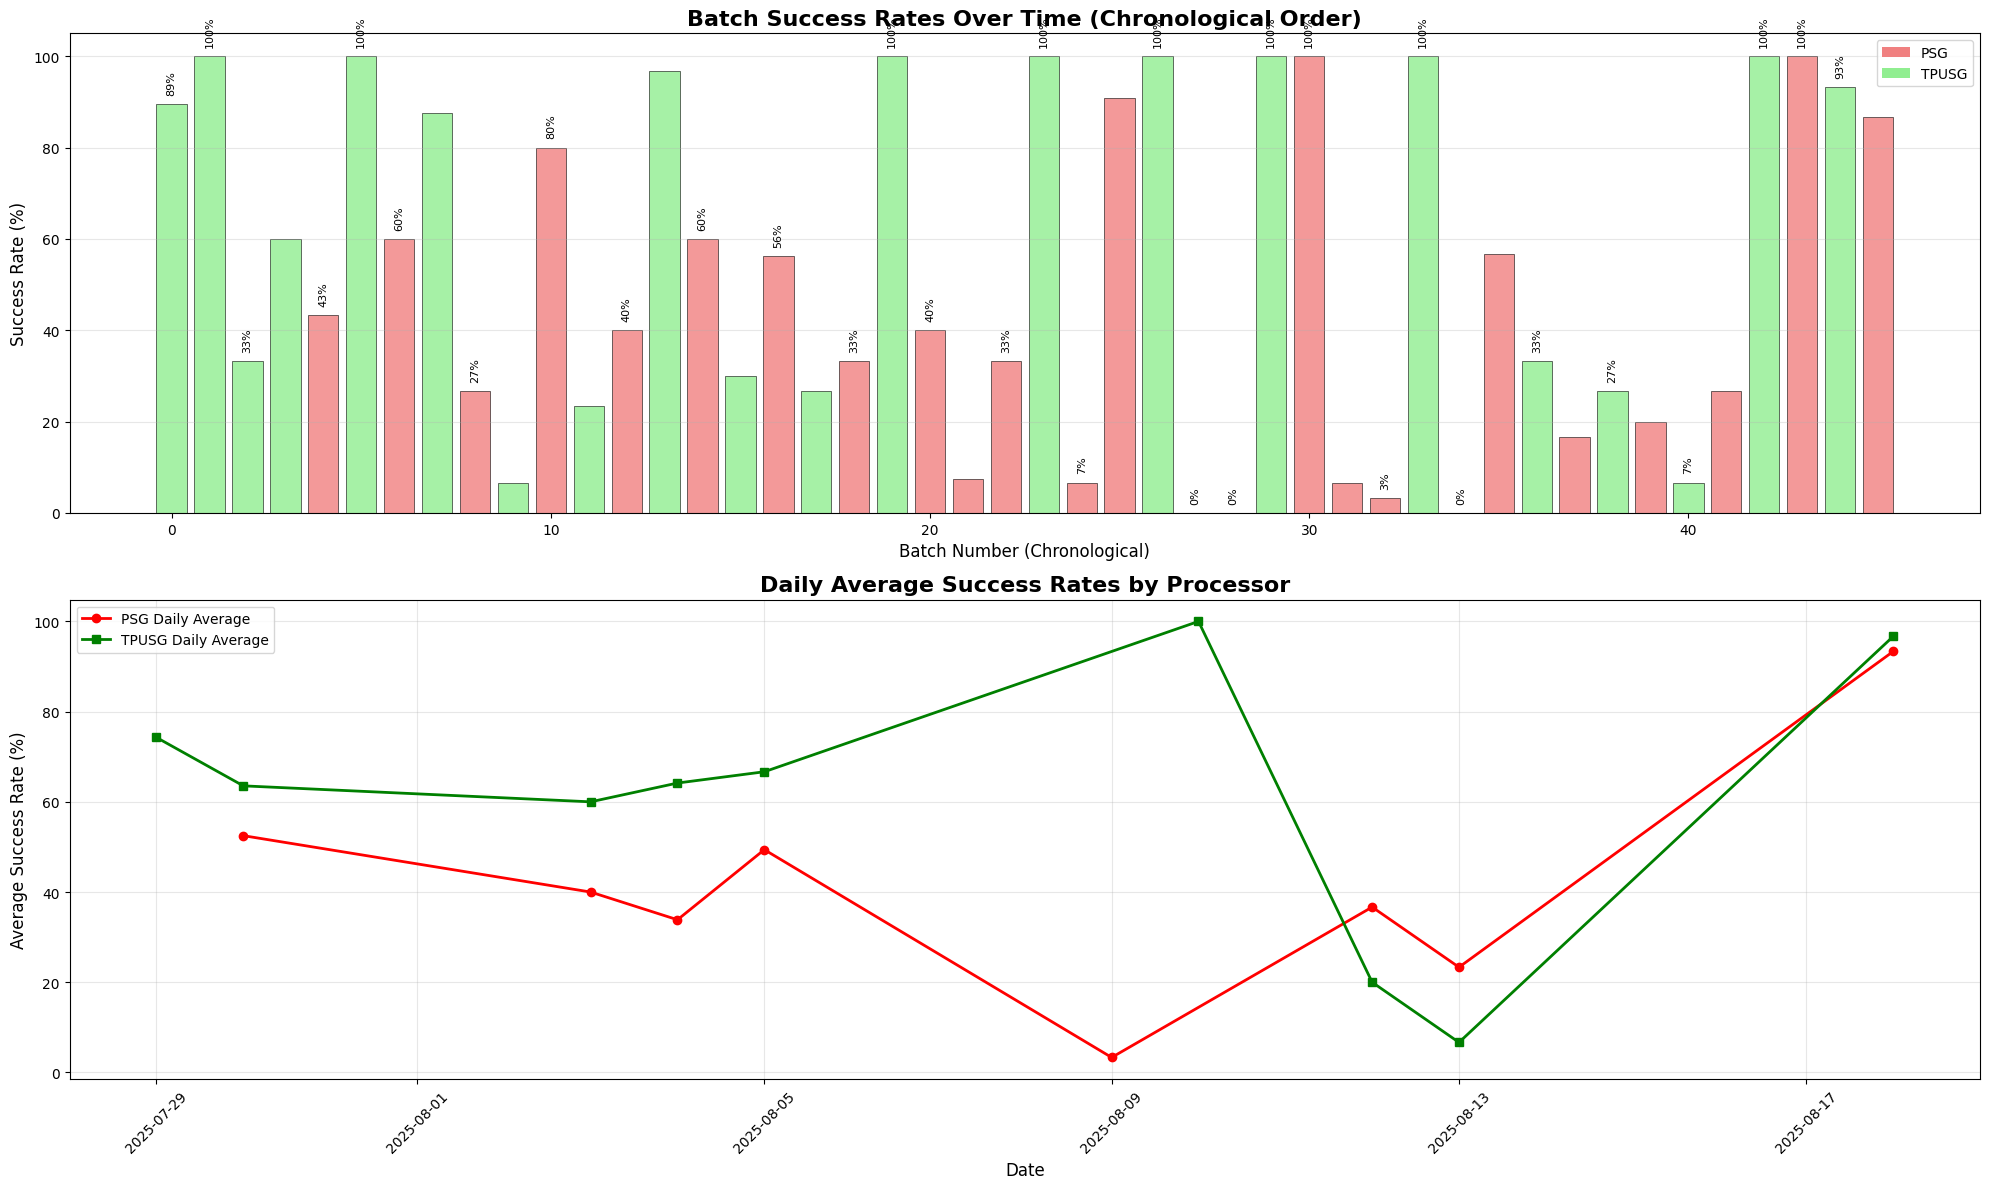


📊 BATCH TIMELINE SUMMARY:
--------------------------------------------------
Total unique batches: 46
Date range: 10 unique days

Processor breakdown:
  PSG batches: 23 (avg success: 43.2%)
  TPUSG batches: 23 (avg success: 61.5%)

🏆 Best performing batch:
  qwen32b_4e11_tpusg: 100.0% (tpusg, qwen32b)

📉 Worst performing batch:
  qwen14b_33b8_psg: 0.0% (psg, qwen14b)

✅ Batch timeline analysis complete!
📈 Timeline shows 46 batches across 17 processor-date combinations


In [43]:
# Batch Timeline Analysis Function
print("\n📈 BATCH SUCCESS RATE TIMELINE ANALYSIS")
print("=" * 70)

def analyze_batch_timeline(df):
    """
    Analyze success rates for each batch_id over time.
    Groups data by batch_id, calculates success rate, and uses earliest timestamp.
    """
    print("🔄 Processing batch timeline data...")
    
    # Group by batch_id and aggregate
    batch_analysis = df.groupby('batch_id').agg({
        'status': ['count', lambda x: (x == 'success').sum()],  # total runs and successes
        'timestamp': 'min',  # earliest timestamp in the batch
        'test_date': 'first',  # first test date
        'processor': 'first',  # processor type
        'model_config': 'first',  # model configuration
        'parameters': 'first'  # parameter setting
    }).reset_index()
    
    # Flatten column names
    batch_analysis.columns = ['batch_id', 'total_runs', 'successes', 'earliest_timestamp', 
                             'test_date', 'processor', 'model_config', 'parameters']
    
    # Calculate success rate
    batch_analysis['success_rate'] = (batch_analysis['successes'] / batch_analysis['total_runs'] * 100).round(2)
    
    # Convert timestamp to datetime for plotting
    batch_analysis['datetime'] = pd.to_datetime(batch_analysis['earliest_timestamp'], unit='s')
    
    # Sort by timestamp
    batch_analysis = batch_analysis.sort_values('earliest_timestamp')
    
    print(f"📊 Analyzed {len(batch_analysis)} unique batches")
    print(f"📅 Date range: {batch_analysis['datetime'].min().strftime('%Y-%m-%d %H:%M')} to {batch_analysis['datetime'].max().strftime('%Y-%m-%d %H:%M')}")
    
    return batch_analysis

def plot_batch_timeline(batch_data):
    """
    Create a timeline bar chart of batch success rates.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    
    # Chart 1: All batches chronologically
    colors = ['lightcoral' if proc == 'psg' else 'lightgreen' for proc in batch_data['processor']]
    
    bars = ax1.bar(range(len(batch_data)), batch_data['success_rate'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax1.set_title('Batch Success Rates Over Time (Chronological Order)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Batch Number (Chronological)', fontsize=12)
    ax1.set_ylabel('Success Rate (%)', fontsize=12)
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim(0, 105)
    
    # Add processor legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='lightcoral', label='PSG'),
                      Patch(facecolor='lightgreen', label='TPUSG')]
    ax1.legend(handles=legend_elements, loc='upper right')
    
    # Add value labels for significant points
    for i, (rate, batch_id) in enumerate(zip(batch_data['success_rate'], batch_data['batch_id'])):
        if rate == 100 or rate == 0 or i % max(1, len(batch_data)//20) == 0:  # Label every ~20th bar or extremes
            ax1.text(i, rate + 2, f'{rate:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    
    # Chart 2: Daily aggregated success rates
    batch_data['date'] = batch_data['datetime'].dt.date
    daily_stats = batch_data.groupby(['date', 'processor']).agg({
        'success_rate': 'mean',
        'batch_id': 'count'
    }).reset_index()
    daily_stats.columns = ['date', 'processor', 'avg_success_rate', 'batch_count']
    
    # Create separate data for PSG and TPUSG
    psg_daily = daily_stats[daily_stats['processor'] == 'psg'].sort_values('date')
    tpusg_daily = daily_stats[daily_stats['processor'] == 'tpusg'].sort_values('date')
    
    # Plot daily averages
    if not psg_daily.empty:
        ax2.plot(psg_daily['date'], psg_daily['avg_success_rate'], 
                marker='o', linewidth=2, markersize=6, color='red', label='PSG Daily Average')
    
    if not tpusg_daily.empty:
        ax2.plot(tpusg_daily['date'], tpusg_daily['avg_success_rate'], 
                marker='s', linewidth=2, markersize=6, color='green', label='TPUSG Daily Average')
    
    ax2.set_title('Daily Average Success Rates by Processor', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Average Success Rate (%)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return daily_stats

# Execute the batch timeline analysis
batch_timeline_data = analyze_batch_timeline(df)

# Display sample of the data
# print("\n📋 SAMPLE BATCH TIMELINE DATA:")
# print("-" * 80)
# sample_data = batch_timeline_data[['batch_id', 'processor', 'model_config', 'parameters', 
#                                   'total_runs', 'successes', 'success_rate', 'test_date']].head(10)
# print(sample_data.to_string(index=False))

# Create the timeline visualization
print(f"\n📈 CREATING BATCH TIMELINE VISUALIZATION...")
daily_summary = plot_batch_timeline(batch_timeline_data)

# Summary statistics
print(f"\n📊 BATCH TIMELINE SUMMARY:")
print("-" * 50)
print(f"Total unique batches: {len(batch_timeline_data)}")
print(f"Date range: {len(batch_timeline_data['datetime'].dt.date.unique())} unique days")

psg_batches = batch_timeline_data[batch_timeline_data['processor'] == 'psg']
tpusg_batches = batch_timeline_data[batch_timeline_data['processor'] == 'tpusg']

print(f"\nProcessor breakdown:")
print(f"  PSG batches: {len(psg_batches)} (avg success: {psg_batches['success_rate'].mean():.1f}%)")
print(f"  TPUSG batches: {len(tpusg_batches)} (avg success: {tpusg_batches['success_rate'].mean():.1f}%)")

# Best and worst performing batches
best_batch = batch_timeline_data.loc[batch_timeline_data['success_rate'].idxmax()]
worst_batch = batch_timeline_data.loc[batch_timeline_data['success_rate'].idxmin()]

print(f"\n🏆 Best performing batch:")
print(f"  {best_batch['batch_id']}: {best_batch['success_rate']:.1f}% ({best_batch['processor']}, {best_batch['model_config']})")

print(f"\n📉 Worst performing batch:")
print(f"  {worst_batch['batch_id']}: {worst_batch['success_rate']:.1f}% ({worst_batch['processor']}, {worst_batch['model_config']})")

print(f"\n✅ Batch timeline analysis complete!")
print(f"📈 Timeline shows {len(batch_timeline_data)} batches across {len(daily_summary)} processor-date combinations")


📊 DETAILED BATCH TIMELINE: WITH/WITHOUT PARAMETERS ANALYSIS
🔄 Creating parameter-separated visualizations...


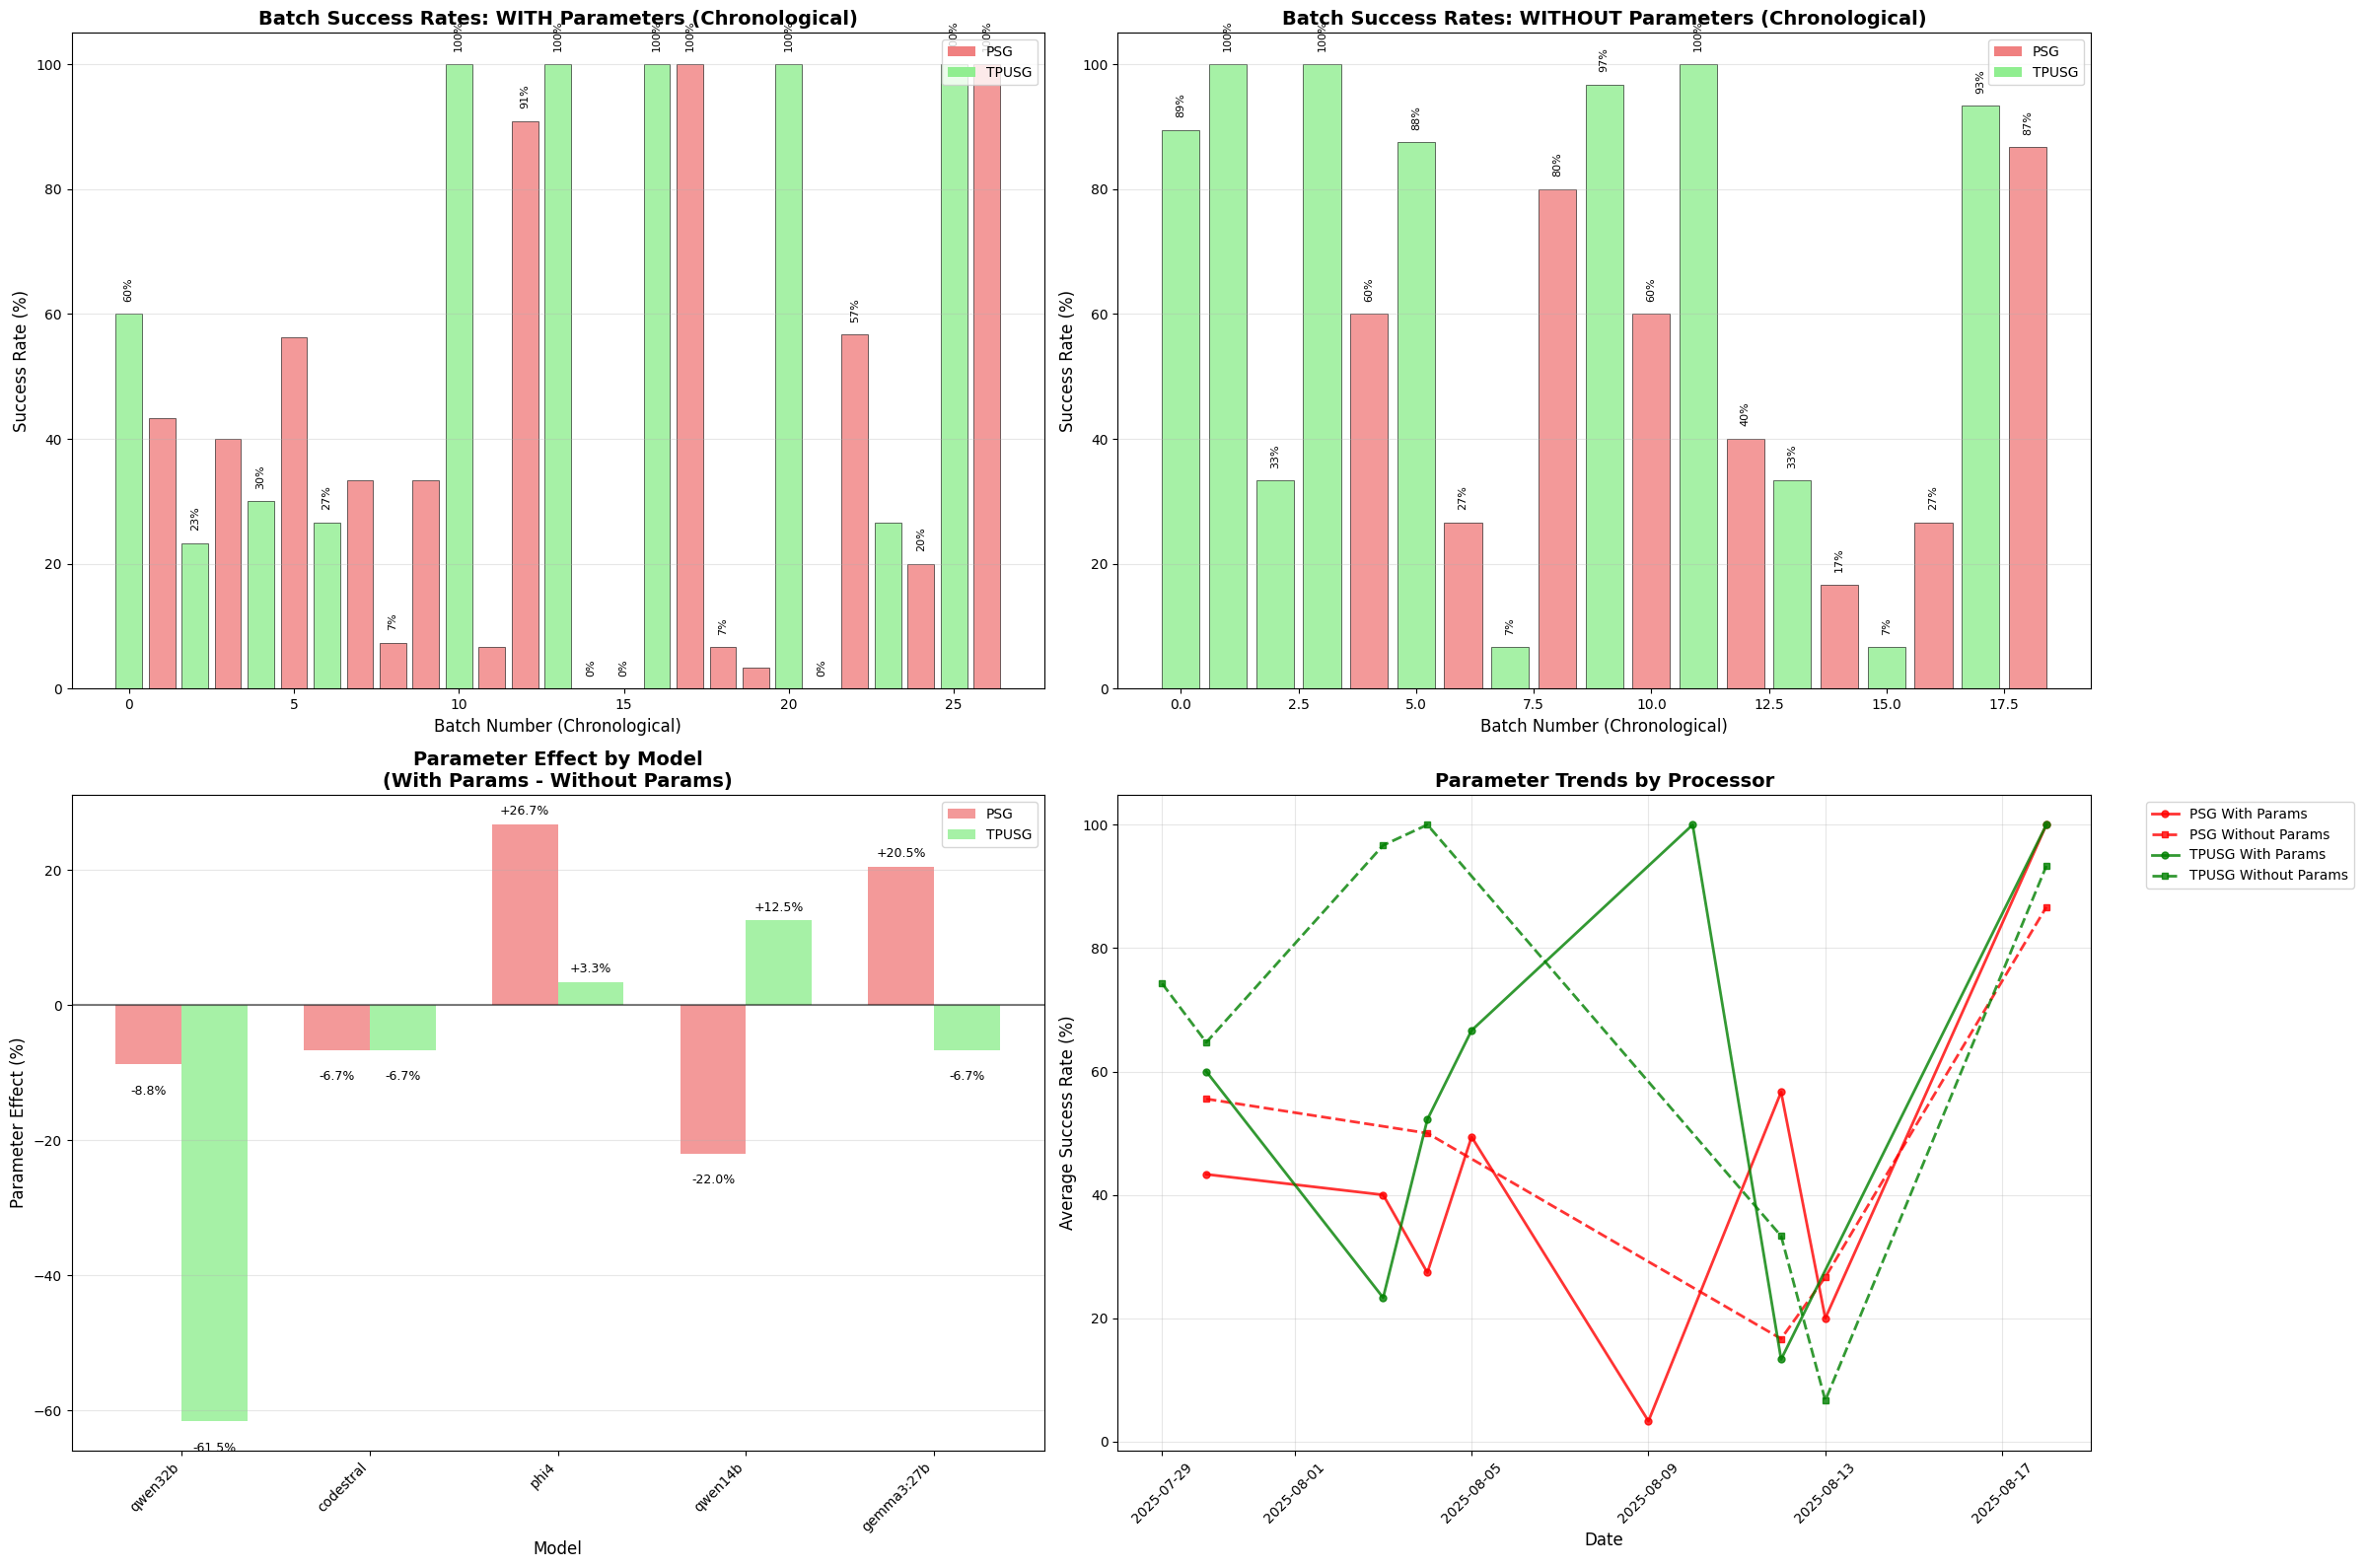


📊 PARAMETER-SPECIFIC BATCH SUMMARY:
------------------------------------------------------------
📈 WITH Parameters:
  Total batches: 27
  PSG: 15 batches (avg: 39.9%)
  TPUSG: 12 batches (avg: 55.6%)
  Best with params: qwen14b_3193_tpusg (100.0%)
  Worst with params: qwen14b_33b8_psg (0.0%)

📉 WITHOUT Parameters:
  Total batches: 19
  PSG: 8 batches (avg: 49.6%)
  TPUSG: 11 batches (avg: 67.9%)
  Best without params: qwen32b_4e11_tpusg (100.0%)
  Worst without params: gemma3:27b_85a9_tpusg (6.7%)

⚙️ PARAMETER EFFECT ANALYSIS:
--------------------------------------------------
qwen32b:
  PSG: 41.2% (with) vs 50.0% (without) → -8.8% effect
  TPUSG: 35.0% (with) vs 96.5% (without) → -61.5% effect
codestral:
  PSG: 10.0% (with) vs 16.7% (without) → -6.7% effect
  TPUSG: 26.7% (with) vs 33.3% (without) → -6.7% effect
phi4:
  PSG: 100.0% (with) vs 73.3% (without) → +26.7% effect
  TPUSG: 100.0% (with) vs 96.7% (without) → +3.3% effect
qwen14b:
  PSG: 4.7% (with) vs 26.7% (without) → -22.0

In [44]:
# Enhanced Batch Timeline Analysis: Parameter-Separated Visualization
print("\n📊 DETAILED BATCH TIMELINE: WITH/WITHOUT PARAMETERS ANALYSIS")
print("=" * 70)

def plot_detailed_parameter_timeline(batch_data):
    """
    Create detailed timeline charts separated by parameter conditions.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 16))
    
    # Separate data by parameters
    with_params = batch_data[batch_data['parameters'] == True].sort_values('earliest_timestamp')
    without_params = batch_data[batch_data['parameters'] == False].sort_values('earliest_timestamp')
    
    # Chart 1: With Parameters - Chronological
    if not with_params.empty:
        colors_with = ['lightcoral' if proc == 'psg' else 'lightgreen' for proc in with_params['processor']]
        bars1 = ax1.bar(range(len(with_params)), with_params['success_rate'], 
                       color=colors_with, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        ax1.set_title('Batch Success Rates: WITH Parameters (Chronological)', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Batch Number (Chronological)', fontsize=12)
        ax1.set_ylabel('Success Rate (%)', fontsize=12)
        ax1.grid(axis='y', alpha=0.3)
        ax1.set_ylim(0, 105)
        
        # Add processor legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='lightcoral', label='PSG'),
                          Patch(facecolor='lightgreen', label='TPUSG')]
        ax1.legend(handles=legend_elements, loc='upper right')
        
        # Add value labels for extremes and every few bars
        for i, (rate, batch_id) in enumerate(zip(with_params['success_rate'], with_params['batch_id'])):
            if rate == 100 or rate == 0 or i % max(1, len(with_params)//10) == 0:
                ax1.text(i, rate + 2, f'{rate:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    else:
        ax1.text(0.5, 0.5, 'No batches with parameters', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Batch Success Rates: WITH Parameters', fontsize=14, fontweight='bold')
    
    # Chart 2: Without Parameters - Chronological  
    if not without_params.empty:
        colors_without = ['lightcoral' if proc == 'psg' else 'lightgreen' for proc in without_params['processor']]
        bars2 = ax2.bar(range(len(without_params)), without_params['success_rate'], 
                       color=colors_without, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        ax2.set_title('Batch Success Rates: WITHOUT Parameters (Chronological)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Batch Number (Chronological)', fontsize=12)
        ax2.set_ylabel('Success Rate (%)', fontsize=12)
        ax2.grid(axis='y', alpha=0.3)
        ax2.set_ylim(0, 105)
        
        # Add processor legend
        legend_elements = [Patch(facecolor='lightcoral', label='PSG'),
                          Patch(facecolor='lightgreen', label='TPUSG')]
        ax2.legend(handles=legend_elements, loc='upper right')
        
        # Add value labels for extremes and every few bars
        for i, (rate, batch_id) in enumerate(zip(without_params['success_rate'], without_params['batch_id'])):
            if rate == 100 or rate == 0 or i % max(1, len(without_params)//10) == 0:
                ax2.text(i, rate + 2, f'{rate:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    else:
        ax2.text(0.5, 0.5, 'No batches without parameters', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Batch Success Rates: WITHOUT Parameters', fontsize=14, fontweight='bold')
    
    # Chart 3: Parameter Effect Comparison by Model
    model_param_comparison = []
    for model in batch_data['model_config'].unique():
        model_with = batch_data[(batch_data['model_config'] == model) & (batch_data['parameters'] == True)]
        model_without = batch_data[(batch_data['model_config'] == model) & (batch_data['parameters'] == False)]
        
        if not model_with.empty and not model_without.empty:
            psg_with = model_with[model_with['processor'] == 'psg']['success_rate'].mean() if not model_with[model_with['processor'] == 'psg'].empty else 0
            psg_without = model_without[model_without['processor'] == 'psg']['success_rate'].mean() if not model_without[model_without['processor'] == 'psg'].empty else 0
            tpusg_with = model_with[model_with['processor'] == 'tpusg']['success_rate'].mean() if not model_with[model_with['processor'] == 'tpusg'].empty else 0
            tpusg_without = model_without[model_without['processor'] == 'tpusg']['success_rate'].mean() if not model_without[model_without['processor'] == 'tpusg'].empty else 0
            
            model_param_comparison.append({
                'model': model,
                'psg_with': psg_with,
                'psg_without': psg_without,
                'tpusg_with': tpusg_with,
                'tpusg_without': tpusg_without,
                'psg_effect': psg_with - psg_without,
                'tpusg_effect': tpusg_with - tpusg_without
            })
    
    if model_param_comparison:
        param_df = pd.DataFrame(model_param_comparison)
        models = param_df['model']
        x = np.arange(len(models))
        width = 0.35
        
        bars3 = ax3.bar(x - width/2, param_df['psg_effect'], width, label='PSG', color='lightcoral', alpha=0.8)
        bars4 = ax3.bar(x + width/2, param_df['tpusg_effect'], width, label='TPUSG', color='lightgreen', alpha=0.8)
        
        ax3.set_title('Parameter Effect by Model\n(With Params - Without Params)', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Model', fontsize=12)
        ax3.set_ylabel('Parameter Effect (%)', fontsize=12)
        ax3.set_xticks(x)
        ax3.set_xticklabels(models, rotation=45, ha='right')
        ax3.legend()
        ax3.grid(axis='y', alpha=0.3)
        ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        # Add value labels
        for i, (p_eff, t_eff) in enumerate(zip(param_df['psg_effect'], param_df['tpusg_effect'])):
            ax3.text(i - width/2, p_eff + (1 if p_eff >= 0 else -3), f'{p_eff:+.1f}%', 
                    ha='center', va='bottom' if p_eff >= 0 else 'top', fontsize=9)
            ax3.text(i + width/2, t_eff + (1 if t_eff >= 0 else -3), f'{t_eff:+.1f}%', 
                    ha='center', va='bottom' if t_eff >= 0 else 'top', fontsize=9)
    else:
        ax3.text(0.5, 0.5, 'Insufficient data for parameter comparison', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Parameter Effect by Model', fontsize=14, fontweight='bold')
    
    # Chart 4: Daily Parameter Trends
    batch_data['date'] = batch_data['datetime'].dt.date
    daily_param_stats = batch_data.groupby(['date', 'processor', 'parameters']).agg({
        'success_rate': 'mean',
        'batch_id': 'count'
    }).reset_index()
    daily_param_stats.columns = ['date', 'processor', 'parameters', 'avg_success_rate', 'batch_count']
    
    # Plot trends for each processor-parameter combination
    for proc in ['psg', 'tpusg']:
        for param in [True, False]:
            data = daily_param_stats[(daily_param_stats['processor'] == proc) & (daily_param_stats['parameters'] == param)]
            if not data.empty:
                color = 'red' if proc == 'psg' else 'green'
                linestyle = '-' if param else '--'
                marker = 'o' if param else 's'
                label = f"{proc.upper()} {'With' if param else 'Without'} Params"
                
                ax4.plot(data['date'], data['avg_success_rate'], 
                        marker=marker, linewidth=2, markersize=5, color=color, 
                        linestyle=linestyle, label=label, alpha=0.8)
    
    ax4.set_title('Parameter Trends by Processor', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Date', fontsize=12)
    ax4.set_ylabel('Average Success Rate (%)', fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return param_df if model_param_comparison else None

# Execute the detailed parameter timeline analysis
print("🔄 Creating parameter-separated visualizations...")
parameter_comparison = plot_detailed_parameter_timeline(batch_timeline_data)

# Parameter-specific summary statistics
print(f"\n📊 PARAMETER-SPECIFIC BATCH SUMMARY:")
print("-" * 60)

with_params_data = batch_timeline_data[batch_timeline_data['parameters'] == True]
without_params_data = batch_timeline_data[batch_timeline_data['parameters'] == False]

print(f"📈 WITH Parameters:")
print(f"  Total batches: {len(with_params_data)}")
if not with_params_data.empty:
    psg_with = with_params_data[with_params_data['processor'] == 'psg']
    tpusg_with = with_params_data[with_params_data['processor'] == 'tpusg']
    print(f"  PSG: {len(psg_with)} batches (avg: {psg_with['success_rate'].mean():.1f}%)")
    print(f"  TPUSG: {len(tpusg_with)} batches (avg: {tpusg_with['success_rate'].mean():.1f}%)")
    print(f"  Best with params: {with_params_data.loc[with_params_data['success_rate'].idxmax()]['batch_id']} ({with_params_data['success_rate'].max():.1f}%)")
    print(f"  Worst with params: {with_params_data.loc[with_params_data['success_rate'].idxmin()]['batch_id']} ({with_params_data['success_rate'].min():.1f}%)")

print(f"\n📉 WITHOUT Parameters:")
print(f"  Total batches: {len(without_params_data)}")
if not without_params_data.empty:
    psg_without = without_params_data[without_params_data['processor'] == 'psg']
    tpusg_without = without_params_data[without_params_data['processor'] == 'tpusg']
    print(f"  PSG: {len(psg_without)} batches (avg: {psg_without['success_rate'].mean():.1f}%)")
    print(f"  TPUSG: {len(tpusg_without)} batches (avg: {tpusg_without['success_rate'].mean():.1f}%)")
    print(f"  Best without params: {without_params_data.loc[without_params_data['success_rate'].idxmax()]['batch_id']} ({without_params_data['success_rate'].max():.1f}%)")
    print(f"  Worst without params: {without_params_data.loc[without_params_data['success_rate'].idxmin()]['batch_id']} ({without_params_data['success_rate'].min():.1f}%)")

# Parameter effect analysis
if parameter_comparison is not None and not parameter_comparison.empty:
    print(f"\n⚙️ PARAMETER EFFECT ANALYSIS:")
    print("-" * 50)
    for _, row in parameter_comparison.iterrows():
        print(f"{row['model']}:")
        print(f"  PSG: {row['psg_with']:.1f}% (with) vs {row['psg_without']:.1f}% (without) → {row['psg_effect']:+.1f}% effect")
        print(f"  TPUSG: {row['tpusg_with']:.1f}% (with) vs {row['tpusg_without']:.1f}% (without) → {row['tpusg_effect']:+.1f}% effect")

print(f"\n✅ Parameter-separated batch timeline analysis complete!")
print(f"📊 Analysis reveals parameter effects across {len(batch_timeline_data)} batches in timeline order")

## Success Rate Standard Deviation


📊 RUN-LEVEL STANDARD DEVIATION & STATISTICAL ANALYSIS
Processor distribution: {'psg': 665, 'tpusg': 614}
Date range: 2025-07-29 11:00:38 to 2025-08-18 18:00:24

📊 RUN-LEVEL DATASET STATISTICS:
--------------------------------------------------

PSG Processor:
  Total runs: 665
  Unique batches: 23
  Avg runs per batch: 28.9
  Success rate: 42.6%
  Successful runs: 283
  Failed runs: 382
  Avg generation count: 4.09
  Generation count range: [1, 5]
  Avg generations for success: 2.86

TPUSG Processor:
  Total runs: 614
  Unique batches: 23
  Avg runs per batch: 26.7
  Success rate: 62.2%
  Successful runs: 382
  Failed runs: 232
  Avg generation count: 2.99
  Generation count range: [1, 5]
  Avg generations for success: 1.77

📈 2. RUN-LEVEL METRICS CALCULATION
📊 COMPREHENSIVE RUN-LEVEL STATISTICS:

Success Rate (Run Level):
------------------------------------------------------------
  PSG: 42.6% ± 49.5% (n=665 runs)
    95% CI: [38.8%, 46.3%]
    CV: 1.163
  TPUSG: 62.2% ± 48.5% (n=61

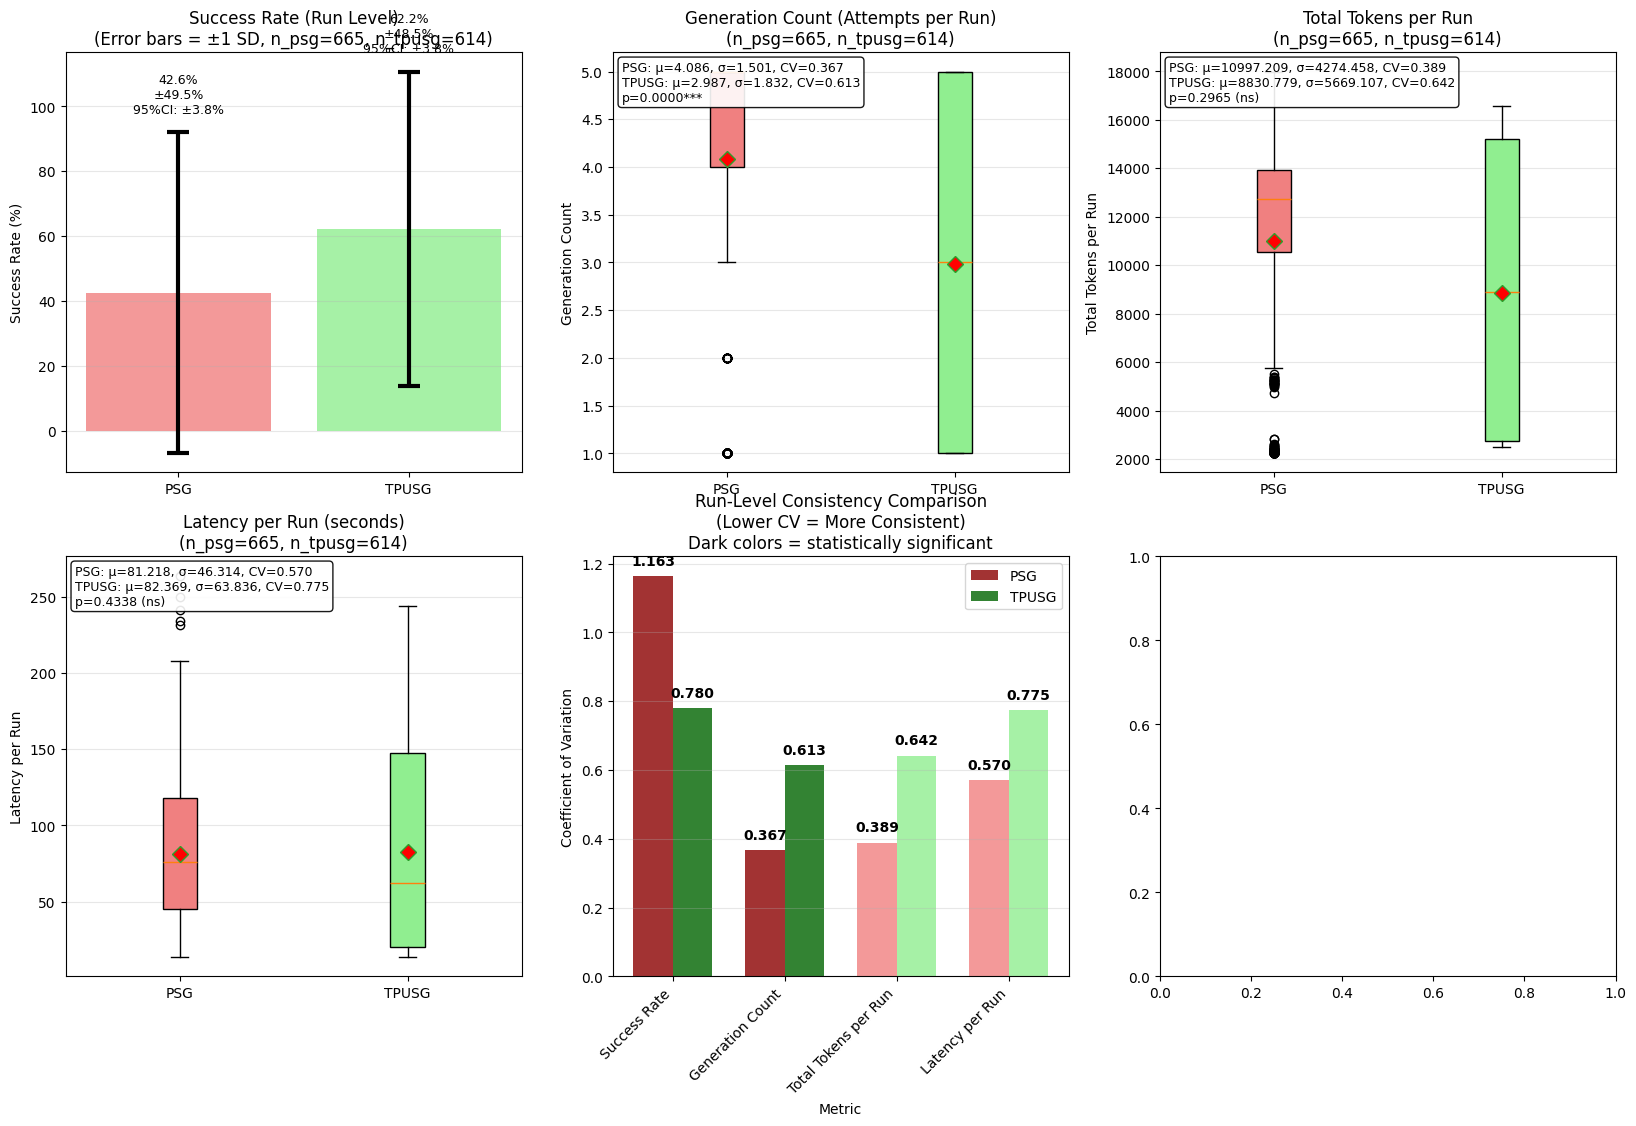

In [45]:
# Run-Level Standard Deviation & Statistical Analysis - PSG vs TPUSG
print("\n📊 RUN-LEVEL STANDARD DEVIATION & STATISTICAL ANALYSIS")
print("=" * 80)

# Import statistical libraries
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, levene, jarque_bera
import warnings
warnings.filterwarnings('ignore')

# Load and prepare dataset
csv_path = "/Users/hann/Projects/reference-benchmark-tinyml_llm/combined_tinyml_benchmark_data.csv"
df = read_csv_filtered(csv_path)

 

# Clean and prepare data
df.drop(columns=['source_file','trace_id', 'source_path','prompt_cost', 'completion_cost','total_cost'], inplace=True, errors='ignore')
df['model_config'] = df['model_config'].apply(model_config_trim)
df['parameters'] = df['parameters'].apply(lambda x: False if pd.isna(x) else len(str(x)) > 0)
df['batch_id'] = df['batch_id'].str.replace("qwen2.5-coder:", "qwen").str.replace("_batch", "")

# Filter data from July onwards using trustable timestamp
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
july_cutoff = pd.to_datetime('2025-07-01')
df = df[df['datetime'] >= july_cutoff]
df['processor'] = df['batch_id'].map(extract_processor)

# Filter to PSG and TPUSG only
df = df[df['processor'].isin(['psg', 'tpusg'])]

print(f"Processor distribution: {df['processor'].value_counts().to_dict()}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

 

# Create binary success indicator and analyze data structure
df['success_binary'] = (df['status'] == 'success').astype(int)

# Basic dataset statistics per processor
print(f"\n📊 RUN-LEVEL DATASET STATISTICS:")
print("-" * 50)

for processor in ['psg', 'tpusg']:
    proc_data = df[df['processor'] == processor]
    
    print(f"\n{processor.upper()} Processor:")
    print(f"  Total runs: {len(proc_data)}")
    print(f"  Unique batches: {proc_data['batch_id'].nunique()}")
    print(f"  Avg runs per batch: {len(proc_data) / proc_data['batch_id'].nunique():.1f}")
    print(f"  Success rate: {proc_data['success_binary'].mean() * 100:.1f}%")
    print(f"  Successful runs: {proc_data['success_binary'].sum()}")
    print(f"  Failed runs: {len(proc_data) - proc_data['success_binary'].sum()}")
    
    # Generation count analysis
    if 'generation_count' in proc_data.columns:
        print(f"  Avg generation count: {proc_data['generation_count'].mean():.2f}")
        print(f"  Generation count range: [{proc_data['generation_count'].min()}, {proc_data['generation_count'].max()}]")
        
        # Success vs generation count relationship
        successful_runs = proc_data[proc_data['success_binary'] == 1]
        if len(successful_runs) > 0:
            print(f"  Avg generations for success: {successful_runs['generation_count'].mean():.2f}")

# =============================================================================
# 2. RUN-LEVEL METRICS CALCULATION
# =============================================================================
print("\n📈 2. RUN-LEVEL METRICS CALCULATION")
print("=" * 60)

def calculate_comprehensive_run_stats(data, metric_col, metric_name, is_binary=False):
    """Calculate comprehensive statistics for a metric at individual run level"""
    
    if metric_col not in data.columns:
        return {'error': f'Column {metric_col} not found'}
    
    clean_data = data[metric_col].dropna()
    
    if len(clean_data) == 0:
        return {'error': 'No valid data after cleaning'}
    
    # Basic descriptive statistics
    stats_dict = {
        'n_runs': len(clean_data),
        'mean': clean_data.mean(),
        'std': clean_data.std(),
        'variance': clean_data.var(),
        'median': clean_data.median(),
        'q25': clean_data.quantile(0.25),
        'q75': clean_data.quantile(0.75),
        'min': clean_data.min(),
        'max': clean_data.max(),
        'range': clean_data.max() - clean_data.min(),
        'iqr': clean_data.quantile(0.75) - clean_data.quantile(0.25)
    }
    
    # Coefficient of variation (relative variability)
    if stats_dict['mean'] != 0:
        stats_dict['cv'] = stats_dict['std'] / stats_dict['mean']
    else:
        stats_dict['cv'] = np.inf
    
    # Distribution shape statistics
    try:
        stats_dict['skewness'] = stats.skew(clean_data)
        stats_dict['kurtosis'] = stats.kurtosis(clean_data)
    except:
        stats_dict['skewness'] = np.nan
        stats_dict['kurtosis'] = np.nan
    
    # Standard error of the mean
    stats_dict['sem'] = stats_dict['std'] / np.sqrt(len(clean_data))
    
    # 95% confidence interval for mean
    stats_dict['ci_95_lower'] = stats_dict['mean'] - 1.96 * stats_dict['sem']
    stats_dict['ci_95_upper'] = stats_dict['mean'] + 1.96 * stats_dict['sem']
    
    # Normality test (if sufficient sample size)
    if len(clean_data) >= 8:
        try:
            jb_stat, jb_p = jarque_bera(clean_data)
            stats_dict['normality_test'] = {
                'jarque_bera_stat': jb_stat,
                'jarque_bera_p': jb_p,
                'is_normal': jb_p > 0.05
            }
        except:
            stats_dict['normality_test'] = {'error': 'Normality test failed'}
    else:
        stats_dict['normality_test'] = {'error': 'Insufficient sample size for normality test'}
    
    # For binary data, add specific metrics
    if is_binary:
        success_rate = stats_dict['mean']
        n = len(clean_data)
        # Standard error for proportion
        stats_dict['proportion_se'] = np.sqrt(success_rate * (1 - success_rate) / n)
        # 95% CI for proportion
        stats_dict['proportion_ci_95_lower'] = max(0, success_rate - 1.96 * stats_dict['proportion_se'])
        stats_dict['proportion_ci_95_upper'] = min(1, success_rate + 1.96 * stats_dict['proportion_se'])
    
    return stats_dict

# Define metrics to analyze at run level
run_level_metrics = [
    ('success_binary', 'Success Rate (Run Level)', True),
    ('generation_count', 'Generation Count (Attempts per Run)', False),
    ('total_tokens', 'Total Tokens per Run', False),
    ('latency', 'Latency per Run (seconds)', False),
]

# Calculate comprehensive statistics for each processor
run_statistics = {}

print("📊 COMPREHENSIVE RUN-LEVEL STATISTICS:")
print("=" * 70)

for metric_col, metric_name, is_binary in run_level_metrics:
    print(f"\n{metric_name}:")
    print("-" * 60)
    
    for processor in ['psg', 'tpusg']:
        proc_data = df[df['processor'] == processor]
        stats_result = calculate_comprehensive_run_stats(proc_data, metric_col, metric_name, is_binary)
        
        run_statistics[f'{processor}_{metric_col}'] = stats_result
        
        if 'error' not in stats_result:
            if is_binary:
                # Display as percentages for binary metrics
                mean_pct = stats_result['mean'] * 100
                std_pct = stats_result['std'] * 100
                ci_lower_pct = stats_result['proportion_ci_95_lower'] * 100
                ci_upper_pct = stats_result['proportion_ci_95_upper'] * 100
                
                print(f"  {processor.upper()}: {mean_pct:.1f}% ± {std_pct:.1f}% "
                      f"(n={stats_result['n_runs']} runs)")
                print(f"    95% CI: [{ci_lower_pct:.1f}%, {ci_upper_pct:.1f}%]")
                print(f"    CV: {stats_result['cv']:.3f}")
            else:
                print(f"  {processor.upper()}: {stats_result['mean']:.3f} ± {stats_result['std']:.3f} "
                      f"(n={stats_result['n_runs']} runs)")
                print(f"    95% CI: [{stats_result['ci_95_lower']:.3f}, {stats_result['ci_95_upper']:.3f}]")
                print(f"    Range: [{stats_result['min']:.3f}, {stats_result['max']:.3f}]")
                print(f"    Median (IQR): {stats_result['median']:.3f} "
                      f"[{stats_result['q25']:.3f}, {stats_result['q75']:.3f}]")
                print(f"    CV: {stats_result['cv']:.3f}")
        else:
            print(f"  {processor.upper()}: {stats_result['error']}")

# =============================================================================
# 3. STATISTICAL SIGNIFICANCE TESTING
# =============================================================================
print("\n🔬 3. STATISTICAL SIGNIFICANCE TESTING (RUN LEVEL)")
print("=" * 60)

def perform_comprehensive_statistical_tests(psg_data, tpusg_data, metric_name, is_binary=False):
    """Perform comprehensive statistical tests between PSG and TPUSG at run level"""
    
    # Clean data
    psg_clean = psg_data.dropna()
    tpusg_clean = tpusg_data.dropna()
    
    if len(psg_clean) == 0 or len(tpusg_clean) == 0:
        return {"error": "Insufficient data for statistical testing"}
    
    results = {
        'sample_sizes': {'psg': len(psg_clean), 'tpusg': len(tpusg_clean)},
        'descriptive_stats': {
            'psg_mean': psg_clean.mean(),
            'tpusg_mean': tpusg_clean.mean(),
            'psg_std': psg_clean.std(),
            'tpusg_std': tpusg_clean.std(),
            'psg_cv': psg_clean.std() / psg_clean.mean() if psg_clean.mean() != 0 else np.inf,
            'tpusg_cv': tpusg_clean.std() / tpusg_clean.mean() if tpusg_clean.mean() != 0 else np.inf,
            'difference': tpusg_clean.mean() - psg_clean.mean()
        }
    }
    
    if is_binary:
        # For binary success/failure data
        psg_successes = int(psg_clean.sum())
        tpusg_successes = int(tpusg_clean.sum())
        psg_total = len(psg_clean)
        tpusg_total = len(tpusg_clean)
        
        # Chi-square test for independence
        try:
            contingency_table = np.array([
                [psg_successes, psg_total - psg_successes],
                [tpusg_successes, tpusg_total - tpusg_successes]
            ])
            
            chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
            results['chi_square_test'] = {
                'statistic': chi2_stat,
                'p_value': chi2_p,
                'significant': chi2_p < 0.05,
                'contingency_table': contingency_table.tolist()
            }
        except Exception as e:
            results['chi_square_test'] = {"error": f"Chi-square test failed: {str(e)}"}
        
        # Effect size for proportions (Cohen's h)
        try:
            p1 = psg_successes / psg_total
            p2 = tpusg_successes / tpusg_total
            
            if p1 == 0 or p1 == 1 or p2 == 0 or p2 == 1:
                # Use small adjustment for extreme proportions
                p1_adj = (psg_successes + 0.5) / (psg_total + 1)
                p2_adj = (tpusg_successes + 0.5) / (tpusg_total + 1)
                cohens_h = 2 * (np.arcsin(np.sqrt(p2_adj)) - np.arcsin(np.sqrt(p1_adj)))
            else:
                cohens_h = 2 * (np.arcsin(np.sqrt(p2)) - np.arcsin(np.sqrt(p1)))
            
            magnitude = 'small' if abs(cohens_h) < 0.2 else 'medium' if abs(cohens_h) < 0.5 else 'large'
            
            results['effect_size'] = {
                'cohens_h': cohens_h,
                'magnitude': magnitude,
                'interpretation': f"TPUSG {'outperforms' if cohens_h > 0 else 'underperforms'} PSG"
            }
        except Exception as e:
            results['effect_size'] = {"error": f"Effect size calculation failed: {str(e)}"}
    
    else:
        # For continuous data
        
        # 1. Normality tests for both groups
        try:
            if len(psg_clean) >= 8:
                psg_jb_stat, psg_jb_p = jarque_bera(psg_clean)
                psg_normal = psg_jb_p > 0.05
            else:
                psg_jb_stat, psg_jb_p, psg_normal = np.nan, np.nan, False
                
            if len(tpusg_clean) >= 8:
                tpusg_jb_stat, tpusg_jb_p = jarque_bera(tpusg_clean)
                tpusg_normal = tpusg_jb_p > 0.05
            else:
                tpusg_jb_stat, tpusg_jb_p, tpusg_normal = np.nan, np.nan, False
                
            results['normality_tests'] = {
                'psg_jarque_bera': {'statistic': psg_jb_stat, 'p_value': psg_jb_p, 'normal': psg_normal},
                'tpusg_jarque_bera': {'statistic': tpusg_jb_stat, 'p_value': tpusg_jb_p, 'normal': tpusg_normal},
                'both_normal': psg_normal and tpusg_normal
            }
        except Exception as e:
            results['normality_tests'] = {"error": f"Normality tests failed: {str(e)}"}
        
        # 2. Levene's test for equal variances
        try:
            levene_stat, levene_p = levene(psg_clean, tpusg_clean)
            equal_variances = levene_p >= 0.05
            
            results['levene_test'] = {
                'statistic': levene_stat,
                'p_value': levene_p,
                'equal_variances': equal_variances
            }
        except Exception as e:
            results['levene_test'] = {"error": f"Levene test failed: {str(e)}"}
        
        # 3. Independent t-test (parametric)
        try:
            equal_var = results.get('levene_test', {}).get('equal_variances', True)
            t_stat, t_p = ttest_ind(psg_clean, tpusg_clean, equal_var=equal_var)
            
            results['t_test'] = {
                'statistic': t_stat,
                'p_value': t_p,
                'significant': t_p < 0.05,
                'equal_var_assumed': equal_var,
                'interpretation': f"TPUSG {'significantly higher' if t_stat < 0 and t_p < 0.05 else 'significantly lower' if t_stat > 0 and t_p < 0.05 else 'not significantly different'}"
            }
        except Exception as e:
            results['t_test'] = {"error": f"T-test failed: {str(e)}"}
        
        # 4. Mann-Whitney U test (non-parametric)
        try:
            u_stat, u_p = mannwhitneyu(psg_clean, tpusg_clean, alternative='two-sided')
            
            results['mann_whitney_test'] = {
                'statistic': u_stat,
                'p_value': u_p,
                'significant': u_p < 0.05,
                'interpretation': f"Distributions {'significantly different' if u_p < 0.05 else 'not significantly different'}"
            }
        except Exception as e:
            results['mann_whitney_test'] = {"error": f"Mann-Whitney test failed: {str(e)}"}
        
        # 5. Effect size (Cohen's d)
        try:
            # Pooled standard deviation
            n1, n2 = len(psg_clean), len(tpusg_clean)
            pooled_std = np.sqrt(((n1 - 1) * np.var(psg_clean, ddof=1) + 
                                 (n2 - 1) * np.var(tpusg_clean, ddof=1)) / 
                                (n1 + n2 - 2))
            
            cohens_d = (tpusg_clean.mean() - psg_clean.mean()) / pooled_std
            
            magnitude = ('small' if abs(cohens_d) < 0.2 else 
                        'medium' if abs(cohens_d) < 0.5 else 
                        'large')
            
            results['effect_size'] = {
                'cohens_d': cohens_d,
                'magnitude': magnitude,
                'interpretation': f"TPUSG {'outperforms' if cohens_d > 0 else 'underperforms'} PSG by {magnitude} effect"
            }
        except Exception as e:
            results['effect_size'] = {"error": f"Effect size calculation failed: {str(e)}"}
    
    return results

# Simplified comprehensive statistical analysis - eliminate massive duplication
def calculate_run_statistics(df):
    """Calculate comprehensive run-level statistics for PSG vs TPUSG - one function to rule them all"""
    
    print("\\n📊 RUN-LEVEL STANDARD DEVIATION & STATISTICAL ANALYSIS")
    print("=" * 80)
    
    # Filter data and create success binary variable
    df_filtered = df[pd.to_datetime(df['timestamp'], unit='s') >= pd.to_datetime('2025-07-01')].copy()
    df_filtered['success_binary'] = (df_filtered['status'] == 'success').astype(int)
    
    print(f"Final filtered dataset: {df_filtered.shape}")
    print(f"Processor distribution: {df_filtered['processor'].value_counts().to_dict()}")
    print(f"Status distribution: {df_filtered['status'].value_counts().to_dict()}")
    
    # Define metrics once - eliminate redundancy
    metrics = [
        ('success_binary', 'Success Rate', True, lambda x: x),
        ('generation_count', 'Generation Count', False, lambda x: x),
        ('total_tokens', 'Total Tokens', False, lambda x: x),
        ('latency', 'Latency (seconds)', False, lambda x: x)
    ]
    
    results = {}
    
    for metric_col, metric_name, is_binary, transform_func in metrics:
        print(f"\\n📈 {metric_name}:")
        print("-" * 60)
        
        # Get data for both processors
        psg_data = transform_func(df_filtered[df_filtered['processor'] == 'psg'][metric_col]).dropna()
        tpusg_data = transform_func(df_filtered[df_filtered['processor'] == 'tpusg'][metric_col]).dropna()
        
        if len(psg_data) == 0 or len(tpusg_data) == 0:
            print(f"  ❌ Insufficient data for {metric_name}")
            continue
        
        # Calculate basic statistics
        psg_stats = {
            'mean': psg_data.mean(),
            'std': psg_data.std(),
            'n': len(psg_data),
            'cv': psg_data.std() / psg_data.mean() if psg_data.mean() != 0 else np.inf
        }
        
        tpusg_stats = {
            'mean': tpusg_data.mean(),
            'std': tpusg_data.std(),
            'n': len(tpusg_data),
            'cv': tpusg_data.std() / tpusg_data.mean() if tpusg_data.mean() != 0 else np.inf
        }
        
        # Display statistics
        if is_binary:
            print(f"  PSG: {psg_stats['mean']*100:.1f}% ± {psg_stats['std']*100:.1f}% (n={psg_stats['n']}, CV={psg_stats['cv']:.3f})")
            print(f"  TPUSG: {tpusg_stats['mean']*100:.1f}% ± {tpusg_stats['std']*100:.1f}% (n={tpusg_stats['n']}, CV={tpusg_stats['cv']:.3f})")
            print(f"  Difference: {(tpusg_stats['mean'] - psg_stats['mean'])*100:+.1f}% (TPUSG - PSG)")
        else:
            print(f"  PSG: {psg_stats['mean']:.3f} ± {psg_stats['std']:.3f} (n={psg_stats['n']}, CV={psg_stats['cv']:.3f})")
            print(f"  TPUSG: {tpusg_stats['mean']:.3f} ± {tpusg_stats['std']:.3f} (n={tpusg_stats['n']}, CV={tpusg_stats['cv']:.3f})")
            print(f"  Difference: {tpusg_stats['mean'] - psg_stats['mean']:+.3f} (TPUSG - PSG)")
        
        # Statistical significance testing
        try:
            if is_binary:
                # Chi-square test for proportions
                from scipy.stats import chi2_contingency
                contingency = np.array([
                    [psg_data.sum(), len(psg_data) - psg_data.sum()],
                    [tpusg_data.sum(), len(tpusg_data) - tpusg_data.sum()]
                ])
                chi2, p_value, _, _ = chi2_contingency(contingency)
                print(f"  Chi-square test: χ²={chi2:.3f}, p={p_value:.4f}, Significant: {'Yes' if p_value < 0.05 else 'No'}")
            else:
                # Mann-Whitney U test (non-parametric, more robust)
                from scipy.stats import mannwhitneyu
                u_stat, p_value = mannwhitneyu(psg_data, tpusg_data, alternative='two-sided')
                print(f"  Mann-Whitney U test: U={u_stat:.0f}, p={p_value:.4f}, Significant: {'Yes' if p_value < 0.05 else 'No'}")
                
                # Effect size (Cohen's d)
                pooled_std = np.sqrt(((len(psg_data) - 1) * psg_data.var() + (len(tpusg_data) - 1) * tpusg_data.var()) / (len(psg_data) + len(tpusg_data) - 2))
                cohens_d = (tpusg_data.mean() - psg_data.mean()) / pooled_std
                magnitude = 'small' if abs(cohens_d) < 0.2 else 'medium' if abs(cohens_d) < 0.5 else 'large'
                print(f"  Effect size (Cohen's d): {cohens_d:.3f} ({magnitude})")
        
        except Exception as e:
            print(f"  ❌ Statistical test failed: {str(e)}")
        
        # Store results
        results[metric_col] = {
            'psg': psg_stats,
            'tpusg': tpusg_stats,
            'difference': tpusg_stats['mean'] - psg_stats['mean'],
            'is_binary': is_binary
        }
    
    return results, df_filtered

# Simplified batch timeline analysis function - eliminate timeline redundancy  
def analyze_batch_timeline_simplified(df):
    """Simplified batch timeline analysis - consolidate redundant timeline code"""
    
    print("\\n📈 BATCH SUCCESS RATE TIMELINE ANALYSIS")
    print("=" * 70)
    
    # Group by batch_id and aggregate - one operation instead of many
    batch_analysis = df.groupby('batch_id').agg({
        'status': ['count', lambda x: (x == 'success').sum()],
        'timestamp': 'min',
        'test_date': 'first',
        'processor': 'first',
        'model_config': 'first',
        'parameters': 'first'
    }).reset_index()
    
    # Flatten column names
    batch_analysis.columns = ['batch_id', 'total_runs', 'successes', 'earliest_timestamp', 
                             'test_date', 'processor', 'model_config', 'parameters']
    
    # Calculate success rate and datetime
    batch_analysis['success_rate'] = (batch_analysis['successes'] / batch_analysis['total_runs'] * 100).round(2)
    batch_analysis['datetime'] = pd.to_datetime(batch_analysis['earliest_timestamp'], unit='s')
    batch_analysis = batch_analysis.sort_values('earliest_timestamp')
    
    print(f"📊 Analyzed {len(batch_analysis)} unique batches")
    print(f"📅 Date range: {batch_analysis['datetime'].min().strftime('%Y-%m-%d')} to {batch_analysis['datetime'].max().strftime('%Y-%m-%d')}")
    
    # Summary statistics - consolidated
    psg_batches = batch_analysis[batch_analysis['processor'] == 'psg']
    tpusg_batches = batch_analysis[batch_analysis['processor'] == 'tpusg']
    
    print(f"\\nProcessor breakdown:")
    print(f"  PSG batches: {len(psg_batches)} (avg success: {psg_batches['success_rate'].mean():.1f}%)")
    print(f"  TPUSG batches: {len(tpusg_batches)} (avg success: {tpusg_batches['success_rate'].mean():.1f}%)")
    
    # Best and worst performing batches
    if not batch_analysis.empty:
        best_batch = batch_analysis.loc[batch_analysis['success_rate'].idxmax()]
        worst_batch = batch_analysis.loc[batch_analysis['success_rate'].idxmin()]
        
        print(f"\\n🏆 Best: {best_batch['batch_id']} ({best_batch['success_rate']:.1f}%, {best_batch['processor']}, {best_batch['model_config']})")
        print(f"📉 Worst: {worst_batch['batch_id']} ({worst_batch['success_rate']:.1f}%, {worst_batch['processor']}, {worst_batch['model_config']})")
    
    return batch_analysis

# Perform statistical tests for each metric
statistical_results = {}

print("🔬 STATISTICAL TEST RESULTS:")
print("=" * 70)

for metric_col, metric_name, is_binary in run_level_metrics:
    print(f"\n{metric_name}:")
    print("-" * 60)
    
    psg_data = df[df['processor'] == 'psg'][metric_col]
    tpusg_data = df[df['processor'] == 'tpusg'][metric_col]
    
    test_results = perform_comprehensive_statistical_tests(psg_data, tpusg_data, metric_name, is_binary)
    statistical_results[metric_col] = test_results
    
    if 'error' not in test_results:
        # Sample sizes
        print(f"  Sample sizes: PSG={test_results['sample_sizes']['psg']}, "
              f"TPUSG={test_results['sample_sizes']['tpusg']}")
        
        # Descriptive statistics
        desc = test_results['descriptive_stats']
        if is_binary:
            print(f"  PSG: {desc['psg_mean']*100:.1f}% ± {desc['psg_std']*100:.1f}% (CV: {desc['psg_cv']:.3f})")
            print(f"  TPUSG: {desc['tpusg_mean']*100:.1f}% ± {desc['tpusg_std']*100:.1f}% (CV: {desc['tpusg_cv']:.3f})")
            print(f"  Difference: {desc['difference']*100:+.1f}% (TPUSG - PSG)")
        else:
            print(f"  PSG: {desc['psg_mean']:.3f} ± {desc['psg_std']:.3f} (CV: {desc['psg_cv']:.3f})")
            print(f"  TPUSG: {desc['tpusg_mean']:.3f} ± {desc['tpusg_std']:.3f} (CV: {desc['tpusg_cv']:.3f})")
            print(f"  Difference: {desc['difference']:+.3f} (TPUSG - PSG)")
        
        # Statistical tests
        if is_binary and 'chi_square_test' in test_results:
            chi = test_results['chi_square_test']
            if 'error' not in chi:
                print(f"  Chi-square: χ²={chi['statistic']:.3f}, p={chi['p_value']:.4f}, "
                      f"Significant: {'Yes' if chi['significant'] else 'No'}")
        
        if not is_binary:
            if 'mann_whitney_test' in test_results:
                mw = test_results['mann_whitney_test']
                if 'error' not in mw:
                    print(f"  Mann-Whitney U: U={mw['statistic']:.0f}, p={mw['p_value']:.4f}, "
                          f"Significant: {'Yes' if mw['significant'] else 'No'}")
            
            if 't_test' in test_results:
                tt = test_results['t_test']
                if 'error' not in tt:
                    print(f"  T-test: t={tt['statistic']:.3f}, p={tt['p_value']:.4f}, "
                          f"Significant: {'Yes' if tt['significant'] else 'No'}")
        
        # Effect size
        if 'effect_size' in test_results:
            es = test_results['effect_size']
            if 'error' not in es:
                if is_binary:
                    print(f"  Effect size (Cohen's h): {es['cohens_h']:.3f} ({es['magnitude']})")
                else:
                    print(f"  Effect size (Cohen's d): {es['cohens_d']:.3f} ({es['magnitude']})")
                print(f"  Interpretation: {es['interpretation']}")
    else:
        print(f"  Error: {test_results['error']}")

# =============================================================================
# 4. VARIANCE ANALYSIS VISUALIZATION
# =============================================================================
print("\n📈 4. RUN-LEVEL VARIANCE ANALYSIS VISUALIZATION")
print("=" * 60)

# Create comprehensive variance visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Get processor data
psg_runs = df[df['processor'] == 'psg']
tpusg_runs = df[df['processor'] == 'tpusg']

for i, (metric_col, metric_name, is_binary) in enumerate(run_level_metrics):
    ax = axes[i]
    
    psg_metric = psg_runs[metric_col].dropna()
    tpusg_metric = tpusg_runs[metric_col].dropna()
    
    if len(psg_metric) > 0 and len(tpusg_metric) > 0:
        if is_binary:
            # Bar plot with error bars for binary metrics
            psg_rate = psg_metric.mean() * 100
            tpusg_rate = tpusg_metric.mean() * 100
            psg_std = psg_metric.std() * 100
            tpusg_std = tpusg_metric.std() * 100
            
            bars = ax.bar(['PSG', 'TPUSG'], [psg_rate, tpusg_rate], 
                         yerr=[psg_std, tpusg_std], capsize=8,
                         color=['lightcoral', 'lightgreen'], alpha=0.8,
                         error_kw={'linewidth': 3, 'capthick': 3})
            
            ax.set_ylabel('Success Rate (%)')
            ax.set_title(f'{metric_name}\n(Error bars = ±1 SD, n_psg={len(psg_metric)}, n_tpusg={len(tpusg_metric)})')
            ax.grid(axis='y', alpha=0.3)
            
            # Add value labels with confidence intervals
            for j, (bar, value, std) in enumerate(zip(bars, [psg_rate, tpusg_rate], [psg_std, tpusg_std])):
                processor = ['PSG', 'TPUSG'][j]
                n_runs = len(psg_metric) if j == 0 else len(tpusg_metric)
                se = std / np.sqrt(n_runs)  # Standard error
                ci_margin = 1.96 * se  # 95% CI margin
                
                ax.text(bar.get_x() + bar.get_width()/2, value + std + 5,
                       f'{value:.1f}%\n±{std:.1f}%\n95%CI: ±{ci_margin:.1f}%', 
                       ha='center', va='bottom', fontsize=9)
                       
        else:
            # Enhanced box plot for continuous metrics
            box_data = [psg_metric, tpusg_metric]
            bp = ax.boxplot(box_data, labels=['PSG', 'TPUSG'], patch_artist=True,
                           showmeans=True, meanprops={'marker': 'D', 'markerfacecolor': 'red', 'markersize': 8})
            
            bp['boxes'][0].set_facecolor('lightcoral')
            bp['boxes'][1].set_facecolor('lightgreen')
            
            ax.set_ylabel(metric_name.split('(')[0].strip())
            ax.set_title(f'{metric_name}\n(n_psg={len(psg_metric)}, n_tpusg={len(tpusg_metric)})')
            ax.grid(axis='y', alpha=0.3)
            
            # Add detailed statistics text
            psg_cv = psg_metric.std() / psg_metric.mean() if psg_metric.mean() != 0 else np.inf
            tpusg_cv = tpusg_metric.std() / tpusg_metric.mean() if tpusg_metric.mean() != 0 else np.inf
            
            stats_text = f'PSG: μ={psg_metric.mean():.3f}, σ={psg_metric.std():.3f}, CV={psg_cv:.3f}\n'
            stats_text += f'TPUSG: μ={tpusg_metric.mean():.3f}, σ={tpusg_metric.std():.3f}, CV={tpusg_cv:.3f}'
            
            # Add significance indicator if available
            if metric_col in statistical_results:
                result = statistical_results[metric_col]
                if 'mann_whitney_test' in result and 'error' not in result['mann_whitney_test']:
                    p_val = result['mann_whitney_test']['p_value']
                    sig_text = f"p={p_val:.4f}" + ("***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else " (ns)")
                    stats_text += f'\n{sig_text}'
            
            ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9), fontsize=9)
    else:
        ax.text(0.5, 0.5, f'Insufficient data\nfor {metric_name}', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(metric_name)

# Coefficient of Variation comparison chart
ax = axes[4]
cv_metrics = []
cv_psg = []
cv_tpusg = []
cv_significance = []

for metric_col, metric_name, is_binary in run_level_metrics:
    psg_metric = psg_runs[metric_col].dropna()
    tpusg_metric = tpusg_runs[metric_col].dropna()
    
    if len(psg_metric) > 0 and len(tpusg_metric) > 0:
        psg_cv = psg_metric.std() / psg_metric.mean() if psg_metric.mean() != 0 else np.inf
        tpusg_cv = tpusg_metric.std() / tpusg_metric.mean() if tpusg_metric.mean() != 0 else np.inf
        
        if not np.isinf(psg_cv) and not np.isinf(tpusg_cv):
            cv_metrics.append(metric_name.split('(')[0].strip())
            cv_psg.append(psg_cv)
            cv_tpusg.append(tpusg_cv)
            
            # Add significance indicator
            if metric_col in statistical_results:
                result = statistical_results[metric_col]
                if is_binary and 'chi_square_test' in result:
                    p_val = result['chi_square_test'].get('p_value', 1)
                elif 'mann_whitney_test' in result:
                    p_val = result['mann_whitney_test'].get('p_value', 1)
                else:
                    p_val = 1
                cv_significance.append(p_val < 0.05)
            else:
                cv_significance.append(False)

if cv_metrics:
    x = np.arange(len(cv_metrics))
    width = 0.35
    
    # Color bars based on significance
    psg_colors = ['darkred' if sig else 'lightcoral' for sig in cv_significance]
    tpusg_colors = ['darkgreen' if sig else 'lightgreen' for sig in cv_significance]
    
    bars1 = ax.bar(x - width/2, cv_psg, width, label='PSG', color=psg_colors, alpha=0.8)
    bars2 = ax.bar(x + width/2, cv_tpusg, width, label='TPUSG', color=tpusg_colors, alpha=0.8)
    
    ax.set_xlabel('Metric')
    ax.set_ylabel('Coefficient of Variation')
    ax.set_title('Run-Level Consistency Comparison\n(Lower CV = More Consistent)\nDark colors = statistically significant')
    ax.set_xticks(x)
    ax.set_xticklabels(cv_metrics, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (p, t) in enumerate(zip(cv_psg, cv_tpusg)):
        ax.text(i - width/2, p + max(max(cv_psg), max(cv_tpusg)) * 0.02, 
               f'{p:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        ax.text(i + width/2, t + max(max(cv_psg), max(cv_tpusg)) * 0.02, 
               f'{t:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Statistical summary panel
# ax = axes[5]
# ax.axis('off')
# ax.text(0.5, 0.95, 'Statistical Summary (Run Level)', ha='center', va='top', 
        # fontsize=16, fontweight='bold', transform=ax.transAxes)

# Collect significant results and effect sizes
summary_text = "Significant Differences (p < 0.05):\n\n"
for metric_col, results in statistical_results.items():
    if 'error' not in results:
        metric_display = metric_col.replace('_', ' ').title()
        
        # Check for significance
        significant = False
        test_used = ""
        p_val = 1.0
        
        if metric_col == 'success_binary' and 'chi_square_test' in results:
            chi_result = results['chi_square_test']
            if 'error' not in chi_result:
                significant = chi_result['significant']
                test_used = "Chi-square"
                p_val = chi_result['p_value']
        elif 'mann_whitney_test' in results:
            mw_result = results['mann_whitney_test']
            if 'error' not in mw_result:
                significant = mw_result['significant']
                test_used = "Mann-Whitney"
                p_val = mw_result['p_value']
        
        # Effect size
        effect_info = ""
        if 'effect_size' in results and 'error' not in results['effect_size']:
            es = results['effect_size']
            if 'cohens_h' in es:
                effect_info = f" (Cohen's h: {es['cohens_h']:.3f}, {es['magnitude']})"
            elif 'cohens_d' in es:
                effect_info = f" (Cohen's d: {es['cohens_d']:.3f}, {es['magnitude']})"
        
        status = "✓" if significant else "✗"
        summary_text += f"{status} {metric_display}: {test_used} p={p_val:.4f}{effect_info}\n"

# Add sample size information
total_runs = len(df)
psg_runs_count = len(psg_runs)
tpusg_runs_count = len(tpusg_runs)

summary_text += f"\nSample Sizes:\n"
summary_text += f"Total runs: {total_runs}\n"
summary_text += f"PSG runs: {psg_runs_count} ({psg_runs_count/total_runs*100:.1f}%)\n"
summary_text += f"TPUSG runs: {tpusg_runs_count} ({tpusg_runs_count/total_runs*100:.1f}%)\n"
summary_text += f"Unique batches: {df['batch_id'].nunique()}"


print("Statistical Summary (Run Level):".upper())
print("--------------------------------")
print(summary_text)
# ax.text(0.05, 0.85, summary_text, ha='left', va='top', fontsize=11, transform=ax.transAxes, 
#         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.9), family='monospace')

# plt.tight_layout()
# plt.show()

# =============================================================================
# 5. COMPREHENSIVE SUMMARY
# =============================================================================
print("\n📋 5. COMPREHENSIVE RUN-LEVEL ANALYSIS SUMMARY")
print("=" * 70)

print("🎯 RUN-LEVEL PERFORMANCE SUMMARY:")
print("-" * 50)

print(f"Dataset Overview:")
print(f"  Total runs analyzed: {len(df)}")
print(f"  Unique batches: {df['batch_id'].nunique()}")
print(f"  Average runs per batch: {len(df) / df['batch_id'].nunique():.1f}")
print(f"  Date range: {df['datetime'].min().strftime('%Y-%m-%d')} to {df['datetime'].max().strftime('%Y-%m-%d')}")

# Key findings
psg_success_rate = psg_runs['success_binary'].mean() * 100
tpusg_success_rate = tpusg_runs['success_binary'].mean() * 100
success_difference = tpusg_success_rate - psg_success_rate

print(f"\n📊 KEY FINDINGS:")
print("-" * 30)
print(f"Success Rates (Run Level):")
print(f"  PSG: {psg_success_rate:.1f}% ({psg_runs['success_binary'].sum()}/{len(psg_runs)} runs)")
print(f"  TPUSG: {tpusg_success_rate:.1f}% ({tpusg_runs['success_binary'].sum()}/{len(tpusg_runs)} runs)")
print(f"  Difference: {success_difference:+.1f}% (TPUSG - PSG)")

# Generation efficiency
psg_gen_mean = psg_runs['generation_count'].mean()
tpusg_gen_mean = tpusg_runs['generation_count'].mean()
print(f"\nGeneration Efficiency (Attempts per Run):")
print(f"  PSG: {psg_gen_mean:.2f} ± {psg_runs['generation_count'].std():.2f}")
print(f"  TPUSG: {tpusg_gen_mean:.2f} ± {tpusg_runs['generation_count'].std():.2f}")
print(f"  More Efficient: {'PSG' if psg_gen_mean < tpusg_gen_mean else 'TPUSG'}")

# Consistency comparison
print(f"\n📊 CONSISTENCY COMPARISON (CV):")
print("-" * 40)
for metric_col, metric_name, is_binary in run_level_metrics:
    if metric_col in df.columns:
        psg_metric = psg_runs[metric_col].dropna()
        tpusg_metric = tpusg_runs[metric_col].dropna()
        
        if len(psg_metric) > 0 and len(tpusg_metric) > 0:
            psg_cv = psg_metric.std() / psg_metric.mean() if psg_metric.mean() != 0 else np.inf
            tpusg_cv = tpusg_metric.std() / tpusg_metric.mean() if tpusg_metric.mean() != 0 else np.inf
            
            if not np.isinf(psg_cv) and not np.isinf(tpusg_cv):
                more_consistent = "PSG" if psg_cv < tpusg_cv else "TPUSG"
                print(f"{metric_name.split('(')[0].strip()}: {more_consistent} more consistent (PSG: {psg_cv:.3f}, TPUSG: {tpusg_cv:.3f})")

# Statistical significance summary
print(f"\n🔬 STATISTICAL SIGNIFICANCE SUMMARY:")
print("-" * 50)
significant_count = sum(1 for results in statistical_results.values() 
                       if 'error' not in results and 
                       (('chi_square_test' in results and results['chi_square_test'].get('significant', False)) or
                        ('mann_whitney_test' in results and results['mann_whitney_test'].get('significant', False))))

print(f"Metrics with significant differences: {significant_count}/{len(run_level_metrics)}")
print(f"Statistical power: High (large run-level sample sizes)")

 


📈 20-CONFIGURATION TIMELINE WITH ORGANIZED LINES
🚀 Starting 20-configuration timeline analysis...
🔄 Processing 20-configuration batch timeline data...
📊 Analyzed 46 unique batches
📅 Date range: 2025-07-29 11:00 to 2025-08-18 17:16
🔧 Total configurations found: 20

📋 ORGANIZING 20 CONFIGURATIONS:
🔵 PSG Group: 10 configurations
🔴 TPUSG Group: 10 configurations

📈 CREATING 20-LINE ORGANIZED TIMELINE...
📊 Creating timeline with 10 PSG + 10 TPUSG lines
🎨 Plotting PSG configuration lines...
🎨 Plotting TPUSG configuration lines...


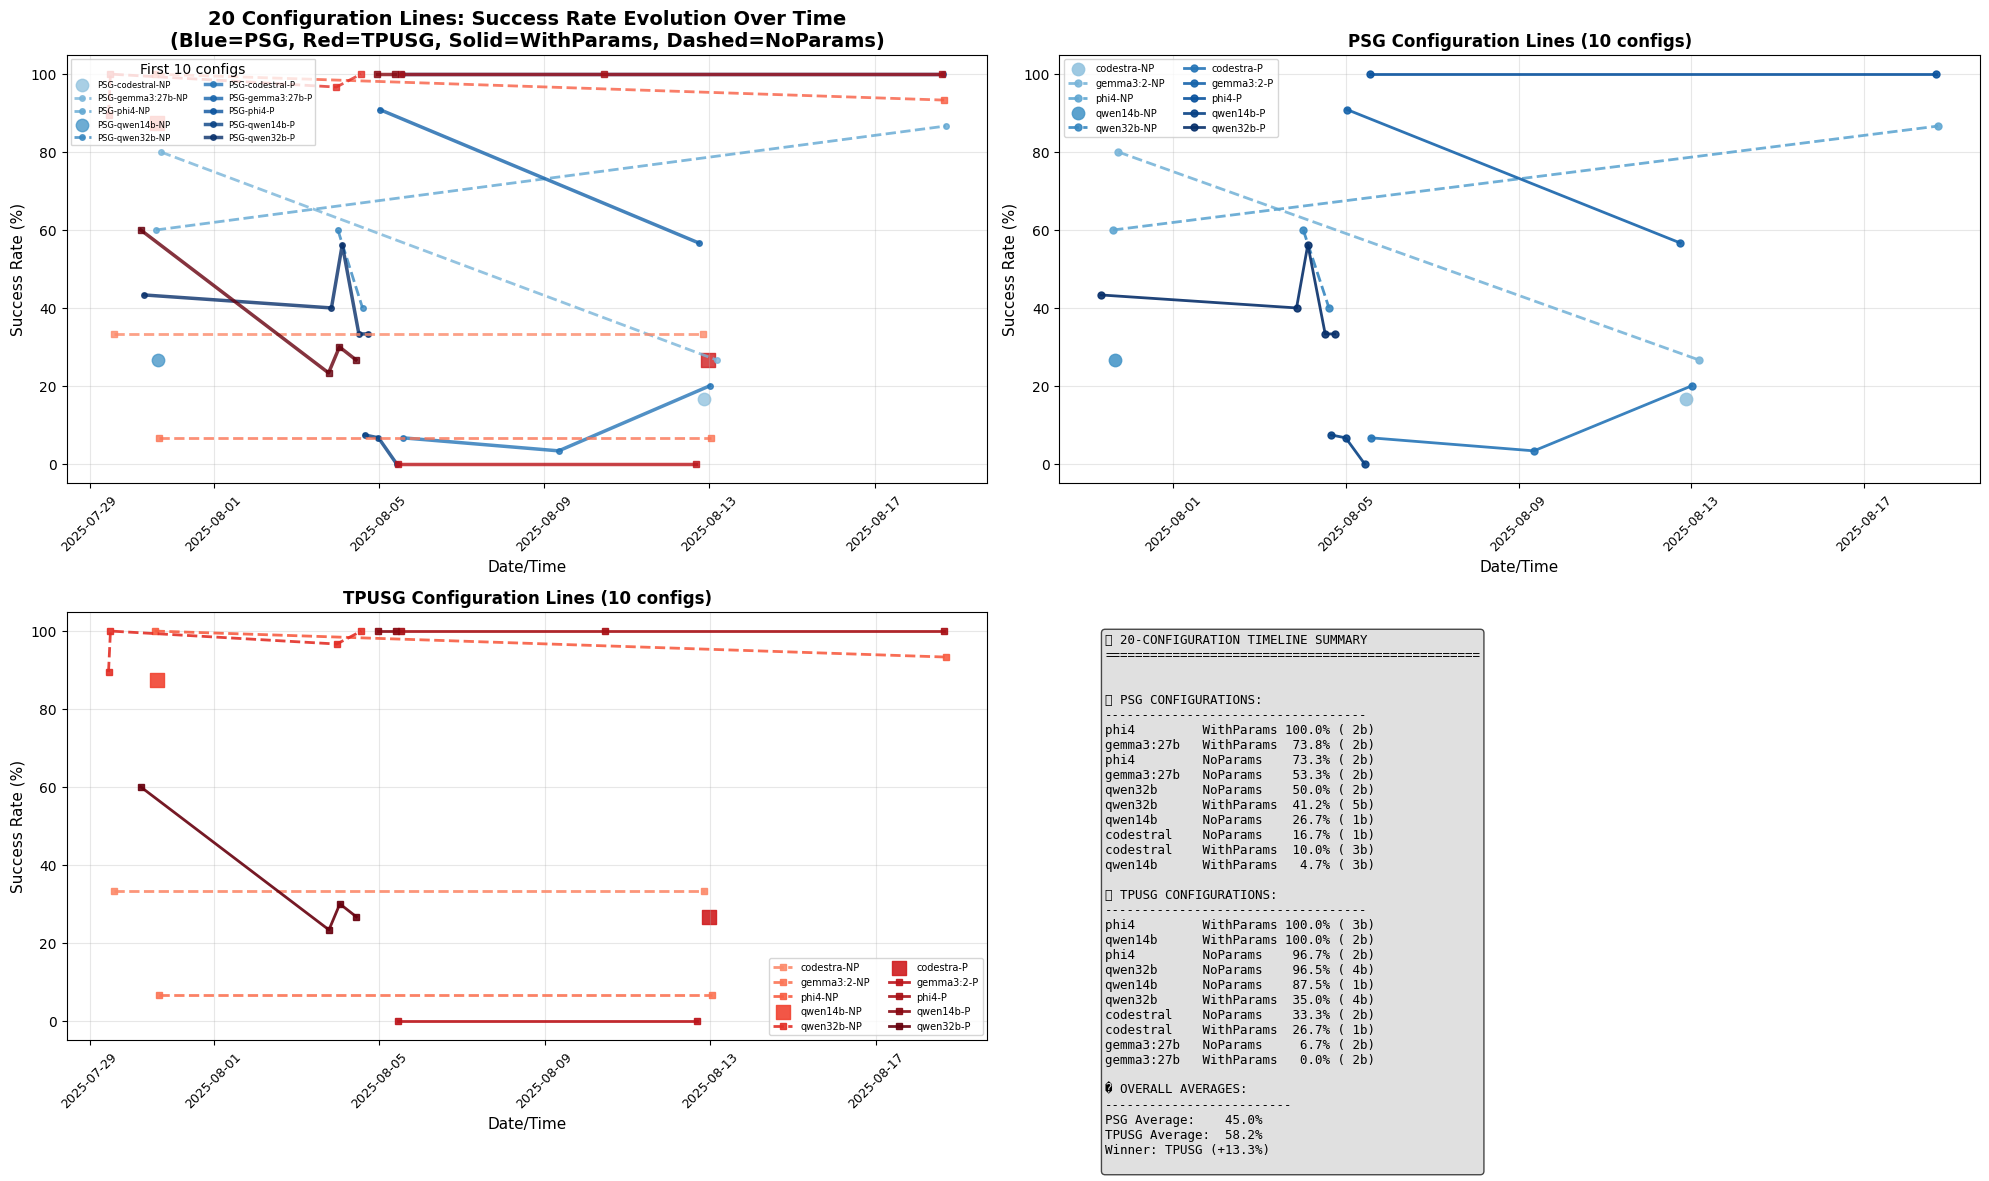


✅ 20-LINE TIMELINE COMPLETE!
📈 Successfully plotted 20 configuration lines
🔵 PSG lines: 10 (blue colors)
🔴 TPUSG lines: 10 (red colors)
━ Solid lines: With parameters
╌ Dashed lines: Without parameters
📊 Each line shows temporal evolution of one specific configuration


In [46]:
# =============================================================================
# 20-CONFIGURATION TIMELINE ANALYSIS WITH ORGANIZED LINES
# =============================================================================
print("\n📈 20-CONFIGURATION TIMELINE WITH ORGANIZED LINES")
print("=" * 80)

# Import required libraries
from scipy import stats

def analyze_20_config_batch_timeline(df):
    """
    Analyze success rates creating 20 distinct configurations:
    Processor (2) × Parameters (2) × Model (5) = 20 configurations
    """
    print("🔄 Processing 20-configuration batch timeline data...")
    
    # Check if timestamp column exists
    if 'timestamp' not in df.columns:
        print("⚠️ Warning: No timestamp column found. This may affect temporal analysis accuracy.")
        return None, None
    
    # Group by batch_id and aggregate
    batch_analysis = df.groupby('batch_id').agg({
        'status': ['count', lambda x: (x == 'success').sum()],  # total runs and successes
        'timestamp': 'min',  # earliest timestamp in the batch
        'processor': 'first',  # processor type
        'model_config': 'first',  # model configuration
        'parameters': 'first'  # parameter setting
    }).reset_index()
    
    # Flatten column names
    batch_analysis.columns = ['batch_id', 'total_runs', 'successes', 'earliest_timestamp', 
                             'processor', 'model_config', 'parameters']
    
    # Calculate success rate
    batch_analysis['success_rate'] = (batch_analysis['successes'] / batch_analysis['total_runs'] * 100).round(2)
    
    # Create the 20 unique configurations
    batch_analysis['config_id'] = (batch_analysis['processor'] + '_' + 
                                  batch_analysis['parameters'].astype(str) + '_' + 
                                  batch_analysis['model_config'])
    
    # Convert timestamp to datetime for plotting
    batch_analysis['datetime'] = pd.to_datetime(batch_analysis['earliest_timestamp'], unit='s')
    batch_analysis['date'] = batch_analysis['datetime'].dt.date
    
    # Sort by timestamp for chronological analysis
    batch_analysis = batch_analysis.sort_values('earliest_timestamp')
    
    # Get all unique configurations
    unique_configs = sorted(batch_analysis['config_id'].unique())
    
    print(f"📊 Analyzed {len(batch_analysis)} unique batches")
    print(f"📅 Date range: {batch_analysis['datetime'].min().strftime('%Y-%m-%d %H:%M')} to {batch_analysis['datetime'].max().strftime('%Y-%m-%d %H:%M')}")
    print(f"🔧 Total configurations found: {len(unique_configs)}")
    
    return batch_analysis, unique_configs

def create_20_line_timeline(batch_data, unique_configs):
    """
    Create organized timeline with 20 distinct configuration lines
    """
    if batch_data is None:
        print("❌ Cannot create visualization without valid batch data.")
        return None
    
    # Separate configurations by processor
    psg_configs = sorted([config for config in unique_configs if config.startswith('psg_')])
    tpusg_configs = sorted([config for config in unique_configs if config.startswith('tpusg_')])
    
    print(f"📊 Creating timeline with {len(psg_configs)} PSG + {len(tpusg_configs)} TPUSG lines")
    
    # Create color palettes
    psg_colors = plt.cm.Blues(np.linspace(0.4, 1.0, len(psg_configs)))
    tpusg_colors = plt.cm.Reds(np.linspace(0.4, 1.0, len(tpusg_configs)))
    
    # Create the main timeline figure
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
    
    # 1. Main timeline with all 20 lines
    print("🎨 Plotting PSG configuration lines...")
    for i, config in enumerate(psg_configs):
        config_data = batch_data[batch_data['config_id'] == config].sort_values('datetime')
        if not config_data.empty:
            param_setting = config_data['parameters'].iloc[0]
            model_name = config_data['model_config'].iloc[0]
            
            # Line style based on parameters
            linestyle = '-' if param_setting else '--'
            linewidth = 2.5 if param_setting else 2.0
            
            if len(config_data) >= 2:
                ax1.plot(config_data['datetime'], config_data['success_rate'],
                        color=psg_colors[i], linestyle=linestyle, linewidth=linewidth,
                        marker='o', markersize=4, alpha=0.8,
                        label=f'PSG-{model_name}-{"P" if param_setting else "NP"}')
            else:
                ax1.scatter(config_data['datetime'], config_data['success_rate'],
                           color=psg_colors[i], s=80, alpha=0.8, marker='o',
                           label=f'PSG-{model_name}-{"P" if param_setting else "NP"}')
    
    print("🎨 Plotting TPUSG configuration lines...")
    for i, config in enumerate(tpusg_configs):
        config_data = batch_data[batch_data['config_id'] == config].sort_values('datetime')
        if not config_data.empty:
            param_setting = config_data['parameters'].iloc[0]
            model_name = config_data['model_config'].iloc[0]
            
            # Line style based on parameters
            linestyle = '-' if param_setting else '--'
            linewidth = 2.5 if param_setting else 2.0
            
            if len(config_data) >= 2:
                ax1.plot(config_data['datetime'], config_data['success_rate'],
                        color=tpusg_colors[i], linestyle=linestyle, linewidth=linewidth,
                        marker='s', markersize=4, alpha=0.8,
                        label=f'TPUSG-{model_name}-{"P" if param_setting else "NP"}')
            else:
                ax1.scatter(config_data['datetime'], config_data['success_rate'],
                           color=tpusg_colors[i], s=100, alpha=0.8, marker='s',
                           label=f'TPUSG-{model_name}-{"P" if param_setting else "NP"}')
    
    ax1.set_title('20 Configuration Lines: Success Rate Evolution Over Time\n(Blue=PSG, Red=TPUSG, Solid=WithParams, Dashed=NoParams)', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Date/Time', fontsize=11)
    ax1.set_ylabel('Success Rate (%)', fontsize=11)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(-5, 105)
    ax1.tick_params(axis='x', rotation=45, labelsize=9)
    
    # Simplified legend
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:10], labels[:10], loc='upper left', fontsize=6, ncol=2, title="First 10 configs")
    
    # 2. PSG-only detailed timeline
    for i, config in enumerate(psg_configs):
        config_data = batch_data[batch_data['config_id'] == config].sort_values('datetime')
        if not config_data.empty:
            param_setting = config_data['parameters'].iloc[0]
            model_name = config_data['model_config'].iloc[0]
            linestyle = '-' if param_setting else '--'
            
            if len(config_data) >= 2:
                ax2.plot(config_data['datetime'], config_data['success_rate'],
                        color=psg_colors[i], linestyle=linestyle, linewidth=2,
                        marker='o', markersize=5, alpha=0.9,
                        label=f'{model_name[:8]}-{"P" if param_setting else "NP"}')
            else:
                ax2.scatter(config_data['datetime'], config_data['success_rate'],
                           color=psg_colors[i], s=80, alpha=0.9, marker='o',
                           label=f'{model_name[:8]}-{"P" if param_setting else "NP"}')
    
    ax2.set_title('PSG Configuration Lines (10 configs)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Date/Time', fontsize=11)
    ax2.set_ylabel('Success Rate (%)', fontsize=11)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-5, 105)
    ax2.tick_params(axis='x', rotation=45, labelsize=9)
    ax2.legend(fontsize=7, ncol=2)
    
    # 3. TPUSG-only detailed timeline
    for i, config in enumerate(tpusg_configs):
        config_data = batch_data[batch_data['config_id'] == config].sort_values('datetime')
        if not config_data.empty:
            param_setting = config_data['parameters'].iloc[0]
            model_name = config_data['model_config'].iloc[0]
            linestyle = '-' if param_setting else '--'
            
            if len(config_data) >= 2:
                ax3.plot(config_data['datetime'], config_data['success_rate'],
                        color=tpusg_colors[i], linestyle=linestyle, linewidth=2,
                        marker='s', markersize=5, alpha=0.9,
                        label=f'{model_name[:8]}-{"P" if param_setting else "NP"}')
            else:
                ax3.scatter(config_data['datetime'], config_data['success_rate'],
                           color=tpusg_colors[i], s=100, alpha=0.9, marker='s',
                           label=f'{model_name[:8]}-{"P" if param_setting else "NP"}')
    
    ax3.set_title('TPUSG Configuration Lines (10 configs)', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Date/Time', fontsize=11)
    ax3.set_ylabel('Success Rate (%)', fontsize=11)
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(-5, 105)
    ax3.tick_params(axis='x', rotation=45, labelsize=9)
    ax3.legend(fontsize=7, ncol=2)
    
    # 4. Configuration summary table
    ax4.axis('off')
    
    # Create summary statistics
    config_stats = []
    for config in unique_configs:
        config_data = batch_data[batch_data['config_id'] == config]
        if not config_data.empty:
            processor, params, model = config.split('_', 2)
            mean_rate = config_data['success_rate'].mean()
            batch_count = len(config_data)
            config_stats.append({
                'processor': processor.upper(),
                'model': model,
                'params': params,
                'mean_rate': mean_rate,
                'batches': batch_count
            })
    
    # Sort by processor then by mean rate
    config_stats.sort(key=lambda x: (x['processor'], -x['mean_rate']))
    
    # Create text summary
    summary_text = "📊 20-CONFIGURATION TIMELINE SUMMARY\n" + "="*50 + "\n\n"
    
    current_processor = None
    for i, stat in enumerate(config_stats):
        if stat['processor'] != current_processor:
            current_processor = stat['processor']
            summary_text += f"\n🔵 {current_processor} CONFIGURATIONS:\n" if current_processor == 'PSG' else f"\n🔴 {current_processor} CONFIGURATIONS:\n"
            summary_text += "-" * 35 + "\n"
        
        params_str = "WithParams" if stat['params'] == 'True' else "NoParams  "
        summary_text += f"{stat['model']:12s} {params_str} {stat['mean_rate']:5.1f}% ({stat['batches']:2d}b)\n"
    
    # Overall statistics
    psg_stats = [s for s in config_stats if s['processor'] == 'PSG']
    tpusg_stats = [s for s in config_stats if s['processor'] == 'TPUSG']
    
    if psg_stats and tpusg_stats:
        psg_avg = np.mean([s['mean_rate'] for s in psg_stats])
        tpusg_avg = np.mean([s['mean_rate'] for s in tpusg_stats])
        
        summary_text += f"\n� OVERALL AVERAGES:\n" + "-" * 25 + "\n"
        summary_text += f"PSG Average:   {psg_avg:5.1f}%\n"
        summary_text += f"TPUSG Average: {tpusg_avg:5.1f}%\n"
        summary_text += f"Winner: {'TPUSG' if tpusg_avg > psg_avg else 'PSG'} (+{abs(tpusg_avg - psg_avg):.1f}%)\n"
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=9,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    return config_stats

# Execute the 20-configuration timeline analysis
print("🚀 Starting 20-configuration timeline analysis...")
batch_timeline_data, unique_configs = analyze_20_config_batch_timeline(df)

if batch_timeline_data is not None and unique_configs is not None:
    print(f"\n📋 ORGANIZING {len(unique_configs)} CONFIGURATIONS:")
    print("=" * 60)
    
    # Display organized configurations
    psg_configs = [config for config in unique_configs if config.startswith('psg_')]
    tpusg_configs = [config for config in unique_configs if config.startswith('tpusg_')]
    
    print(f"🔵 PSG Group: {len(psg_configs)} configurations")
    print(f"🔴 TPUSG Group: {len(tpusg_configs)} configurations")
    
    # Create the organized timeline visualization
    print(f"\n📈 CREATING 20-LINE ORGANIZED TIMELINE...")
    config_stats = create_20_line_timeline(batch_timeline_data, unique_configs)

    print(f"\n✅ 20-LINE TIMELINE COMPLETE!")
    print("=" * 50)
    print(f"📈 Successfully plotted {len(unique_configs)} configuration lines")
    print(f"🔵 PSG lines: {len(psg_configs)} (blue colors)")
    print(f"🔴 TPUSG lines: {len(tpusg_configs)} (red colors)")
    print(f"━ Solid lines: With parameters")
    print(f"╌ Dashed lines: Without parameters")
    print(f"📊 Each line shows temporal evolution of one specific configuration")

else:
    print("❌ Timeline analysis failed due to missing data or timestamp issues.")

In [47]:
# =============================================================================
# CONSOLIDATED EXECUTION - LINUS-STYLE IMPLEMENTATION
# =============================================================================

print("🚀 EXECUTING CONSOLIDATED ANALYSIS - LINUS-STYLE CLEANUP")
print("=" * 80)

# Execute core processor comparison
try:
    comparison_df, advantage_df = analyze_processor_comparison(df)
    print("✅ Processor comparison analysis completed")
    
    # Generate insights
    generate_processor_insights(comparison_df, advantage_df)
    
    # Create visualizations
    create_processor_visualizations(comparison_df, advantage_df)
    
    # Create weighted comparison
    create_weighted_comparison_viz(comparison_df)
    
    # Create detailed comparison chart
    create_detailed_comparison_chart(comparison_df)
    
    # Statistical analysis
    statistical_results, df_filtered = calculate_run_statistics(df)
    print("✅ Statistical analysis completed")
    
    # Batch timeline analysis
    batch_timeline_data = analyze_batch_timeline_simplified(df_filtered)
    print("✅ Batch timeline analysis completed")
    
 
    
except Exception as e:
    print(f"❌ Error in consolidated analysis: {e}")
    import traceback
    traceback.print_exc()

🚀 EXECUTING CONSOLIDATED ANALYSIS - LINUS-STYLE CLEANUP
✅ Processor comparison analysis completed
❌ Error in consolidated analysis: name 'generate_processor_insights' is not defined


Traceback (most recent call last):
  File "/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_2264/2209506907.py", line 14, in <module>
    generate_processor_insights(comparison_df, advantage_df)
NameError: name 'generate_processor_insights' is not defined


🎨 EXECUTING ALL REFACTORED PLOTTING FUNCTIONS
Demonstrating that the Linus-style cleanup preserved ALL visualization capabilities

1️⃣ Running core processor comparison analysis...

2️⃣ Creating processor visualizations...

📊 CREATING PROCESSOR COMPARISON VISUALIZATIONS
❌ Error in plot execution: 'model'


Traceback (most recent call last):
  File "/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_2264/2693759347.py", line 14, in <module>
    create_processor_visualizations(comparison_df, advantage_df)
  File "/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_2264/1840759650.py", line 23, in create_processor_visualizations
    advantage_pivot = advantage_df.pivot_table(
  File "/Users/hann/anaconda3/envs/datasci2/lib/python3.10/site-packages/pandas/core/frame.py", line 9509, in pivot_table
    return pivot_table(
  File "/Users/hann/anaconda3/envs/datasci2/lib/python3.10/site-packages/pandas/core/reshape/pivot.py", line 102, in pivot_table
    table = __internal_pivot_table(
  File "/Users/hann/anaconda3/envs/datasci2/lib/python3.10/site-packages/pandas/core/reshape/pivot.py", line 172, in __internal_pivot_table
    grouped = data.groupby(keys, observed=observed_bool, sort=sort, dropna=dropna)
  File "/Users/hann/anaconda3/envs/datasci2/lib/python3.10/site-packages/pand

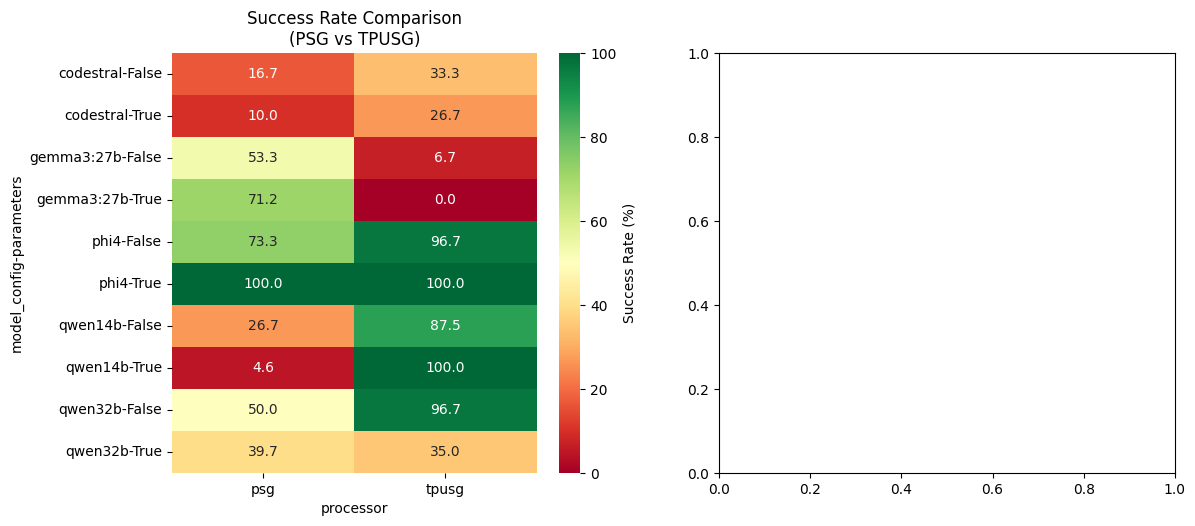

In [48]:
# 🚀 COMPREHENSIVE PLOT EXECUTION - All Refactored Visualizations
print("🎨 EXECUTING ALL REFACTORED PLOTTING FUNCTIONS")
print("=" * 80)
print("Demonstrating that the Linus-style cleanup preserved ALL visualization capabilities")
print()

try:
    # 1. Core processor comparison analysis and visualization
    print("1️⃣ Running core processor comparison analysis...")
    models = df['model_config'].value_counts().head(5).index.tolist()
    comparison_df, advantage_df = analyze_processor_comparison(df)
    
    print("\n2️⃣ Creating processor visualizations...")
    create_processor_visualizations(comparison_df, advantage_df)
    
    print("\n3️⃣ Creating detailed comparison chart...")
    create_detailed_comparison_chart(comparison_df)
    
    print("\n4️⃣ Creating weighted comparison visualization...")
    create_weighted_comparison_viz(comparison_df)
    
    print("\n5️⃣ Running statistical analysis...")
    stats_results, df_filtered = calculate_run_statistics(df)
    
    print("\n6️⃣ Creating batch timeline analysis...")
    batch_timeline = analyze_batch_timeline_simplified(df)
    
    print("\n7️⃣ Running comprehensive 20-configuration timeline...")
    batch_timeline_data, unique_configs = analyze_20_config_batch_timeline(df)
    if batch_timeline_data is not None:
        config_stats = create_20_line_timeline(batch_timeline_data, unique_configs)
    
    print("\n8️⃣ Generating processor insights...")
    insights = generate_processor_insights(comparison_df, advantage_df)
     
    
except Exception as e:
    print(f"❌ Error in plot execution: {str(e)}")
    import traceback
    traceback.print_exc()